In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df=pd.read_csv('train.csv')
df.info()

C:\Users\50259\AppData\Local\Temp\ipykernel_14628\3068579679.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('train.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [3]:
# Se determina columnas que tienen nulos menor al 5% para poder realizar imputacion de datos
cols_rescatables=[col for col in df.columns if (df[col].isnull().mean()<=0.05)]
df[cols_rescatables].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Age                       100000 non-null  object 
 4   SSN                       100000 non-null  object 
 5   Occupation                100000 non-null  object 
 6   Annual_Income             100000 non-null  object 
 7   Num_Bank_Accounts         100000 non-null  int64  
 8   Num_Credit_Card           100000 non-null  int64  
 9   Interest_Rate             100000 non-null  int64  
 10  Num_of_Loan               100000 non-null  object 
 11  Delay_from_due_date       100000 non-null  int64  
 12  Changed_Credit_Limit      100000 non-null  object 
 13  Num_Credit_Inquiries      98035 non-null   fl

In [4]:
#reviso no existan duplicados, de ser asi los borro
display(df.drop_duplicates(inplace=True))

None

In [5]:
df_temp=df[cols_rescatables]

Se clasifican en categoria o numerica previo a realizar el analisis de cada columna

In [6]:
catGen=[col for col in df_temp.columns if (df_temp[col].dtypes=='object')]
numGen=[col for col in df_temp.columns if ((df_temp[col].dtypes!='object'))]

Validacion de columnas del tipo categoria

In [7]:
df[catGen].head()

,ID,Customer_ID,Month,Age,SSN,Occupation,Annual_Income,Num_of_Loan,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,23,821-00-0265,Scientist,19114.12,4,11.27,_,809.98,No,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,23,821-00-0265,Scientist,19114.12,4,11.27,Good,809.98,No,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,-500,821-00-0265,Scientist,19114.12,4,_,Good,809.98,No,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,23,821-00-0265,Scientist,19114.12,4,6.27,Good,809.98,No,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,23,821-00-0265,Scientist,19114.12,4,11.27,Good,809.98,No,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


Se observa que columnas: 

- Annual_Income,  Changed_Credit_Limit, Outstanding_Debt, Amount_invested_monthly, monthly_Balance **deben cambiarse a tipo numerico**.

- Age,Num_of_Loan **deben cambiarse a tipo entero**

In [8]:
# Algunas columnas tiene como signo adicional '_' en su valor numerico por lo que se debe limpiar las columnas 
# previo a convertirlas en numerico

# PASO 1: IDENTIFICAR PATRONES

# Patron 'numero_'
print(f"Annual_Income \n {df_temp[df_temp['Annual_Income'].str.contains('_')]['Annual_Income'].unique()}")
print(f"Outstanding_Debt \n {df_temp[df_temp['Outstanding_Debt'].str.contains('_')]['Outstanding_Debt'].unique()}")
print(f"Age \n {df_temp[df_temp['Age'].str.contains('_')]['Age'].unique()}")
print(f"Num_of_Loan \n {df_temp[df_temp['Num_of_Loan'].str.contains('_')]['Num_of_Loan'].unique()}")

# Patron '_' significa que hay cero cambios en limite de credito
print(f"Changed_Credit_Limit \n {df_temp[df_temp['Changed_Credit_Limit'].str.contains('_')]['Changed_Credit_Limit'].unique()}")

# Patron '__numero__' 
print(f"Amount_invested_monthly \n {df_temp[df_temp['Amount_invested_monthly'].str.contains('_',na=False)]['Amount_invested_monthly'].unique()}")
print(f"Monthly_Balance \n {df_temp[df_temp['Monthly_Balance'].str.contains('_',na=False)]['Monthly_Balance'].unique()}")


Annual_Income 
 ['34847.84_' '30689.89_' '35547.71_' ... '16680.35_' '37188.1_'
 '39628.99_']
Outstanding_Debt 
 ['1328.93_' '1283.37_' '2797.17_' '3818.57_' '343.84_' '363.51_' '404.51_'
 '1755.81_' '2593.44_' '89.62_' '1054.86_' '1374.23_' '1166.47_' '457.81_'
 '1684.06_' '1126.35_' '2098.83_' '761.18_' '1343.01_' '1342.61_'
 '1435.94_' '2354.21_' '1319.87_' '821.27_' '3271.84_' '465.04_' '218.25_'
 '1274.59_' '1033.59_' '642.42_' '94.75_' '4145.87_' '328.41_' '4813.02_'
 '477.41_' '165.88_' '1286.68_' '128.33_' '2106.68_' '3078.82_' '634.77_'
 '878.19_' '2518.51_' '1235.48_' '669.35_' '240.6_' '70.66_' '3099.57_'
 '486.48_' '1124.37_' '152.6_' '1716.82_' '886.09_' '1370.48_' '640.4_'
 '484.43_' '1417.89_' '1539.61_' '2517.0_' '539.59_' '802.47_' '289.1_'
 '4542.88_' '590.85_' '155.2_' '697.86_' '825.25_' '1644.31_' '960.38_'
 '282.06_' '985.01_' '1491.56_' '3723.83_' '1350.6_' '1248.05_' '3531.62_'
 '1017.45_' '60.04_' '2468.2_' '2234.83_' '1073.76_' '4972.01_' '2107.76_'
 '3754.18_

In [9]:
# PASO 2: REEMPLAZAR '-' CON LOS VALORES RESPECTIVOS

# En este caso 'numero_' debe ser 'numero' por tanto se hace el cambio '_' = ''
df_temp['Annual_Income'] = df['Annual_Income'].str.replace('_', '')
df_temp['Outstanding_Debt'] = df['Outstanding_Debt'].str.replace('_', '')
df_temp['Age'] = df['Age'].str.replace('_', '')
df_temp['Num_of_Loan'] = df['Num_of_Loan'].str.replace('_', '')

# En este caso '_' debe ser '0' porque significa sin cambio en limite de credito, por tanto se reemplaza '_' = '0'
df_temp['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].str.replace('_', '0')

# En este caso solo hay un numero con problema: ' __10000__' por tanto se sustituye con 10000
df_temp['Amount_invested_monthly'] = df['Amount_invested_monthly'].str.replace('__10000__', '10000')
# En este caso solo hay un numero con problema: _-3333333_ por tanto se sustituye con -3333333
df_temp['Monthly_Balance'] = df['Monthly_Balance'].str.replace('__-333333333333333333333333333__', '33333333333333333')

C:\Users\50259\AppData\Local\Temp\ipykernel_14628\2158038005.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['Annual_Income'] = df['Annual_Income'].str.replace('_', '')
C:\Users\50259\AppData\Local\Temp\ipykernel_14628\2158038005.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['Outstanding_Debt'] = df['Outstanding_Debt'].str.replace('_', '')
C:\Users\50259\AppData\Local\Temp\ipykernel_14628\2158038005.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [10]:
#PASO 3: CONVERSION A NUMERICO 

#TIPO FLOAT

df_temp['Annual_Income'] = df_temp['Annual_Income'].astype(float)
df_temp['Changed_Credit_Limit'] = df_temp['Changed_Credit_Limit'].astype(float)
df_temp['Outstanding_Debt'] = df_temp['Outstanding_Debt'].astype(float)
df_temp['Amount_invested_monthly'] = df_temp['Amount_invested_monthly'].astype(float)
df_temp['Monthly_Balance'] = df_temp['Monthly_Balance'].astype(float)

#TIPO INT

df_temp['Age'] = df_temp['Age'].astype(int)
df_temp['Num_of_Loan'] = df_temp['Num_of_Loan'].astype(int)

C:\Users\50259\AppData\Local\Temp\ipykernel_14628\863233016.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['Annual_Income'] = df_temp['Annual_Income'].astype(float)
C:\Users\50259\AppData\Local\Temp\ipykernel_14628\863233016.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['Changed_Credit_Limit'] = df_temp['Changed_Credit_Limit'].astype(float)
C:\Users\50259\AppData\Local\Temp\ipykernel_14628\863233016.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [11]:
# PASO 4 VERIFICACION:
df_temp.describe()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,1.000000e+05,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000,100000.000000,95521.000000,9.713200e+04
mean,110.649700,1.764157e+05,17.091280,22.47443,72.466040,3.009960,21.068780,10.171791,27.754251,1426.220376,32.285173,1403.118217,637.412998,3.088580e+12
std,686.244717,1.429618e+06,117.404834,129.05741,466.422621,62.647879,14.860104,6.880628,193.177339,1155.129026,5.116875,8306.041270,2043.319327,3.208492e+14
min,-500.000000,7.005930e+03,-1.000000,0.00000,1.000000,-100.000000,-5.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,7.759665e-03
25%,24.000000,1.945750e+04,3.000000,4.00000,8.000000,1.000000,10.000000,4.970000,3.000000,566.072500,28.052567,30.306660,74.534002,2.700037e+02
50%,33.000000,3.757861e+04,6.000000,5.00000,13.000000,3.000000,18.000000,9.250000,6.000000,1166.155000,32.305784,69.249473,135.925682,3.364770e+02
75%,42.000000,7.279092e+04,7.000000,7.00000,20.000000,5.000000,28.000000,14.660000,9.000000,1945.962500,36.496663,161.224249,265.731733,4.696852e+02
max,8698.000000,2.419806e+07,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,36.970000,2597.000000,4998.070000,50.000000,82331.000000,10000.000000,3.333333e+16


In [12]:
#Creacion correcta del listado
catGen=[col for col in df_temp.columns if (df_temp[col].dtypes=='object')]
numGen=[col for col in df_temp.columns if ((df_temp[col].dtypes!='object'))]

In [13]:
df_temp[catGen].head()

,ID,Customer_ID,Month,SSN,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,0x1602,CUS_0xd40,January,821-00-0265,Scientist,_,No,High_spent_Small_value_payments,Good
1,0x1603,CUS_0xd40,February,821-00-0265,Scientist,Good,No,Low_spent_Large_value_payments,Good
2,0x1604,CUS_0xd40,March,821-00-0265,Scientist,Good,No,Low_spent_Medium_value_payments,Good
3,0x1605,CUS_0xd40,April,821-00-0265,Scientist,Good,No,Low_spent_Small_value_payments,Good
4,0x1606,CUS_0xd40,May,821-00-0265,Scientist,Good,No,High_spent_Medium_value_payments,Good


### Balanceo de Variable target

In [14]:
df['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [15]:
df_standard = df_temp[df_temp['Credit_Score'] == 'Standard']
df_poor = df_temp[df_temp['Credit_Score'] == 'Poor']
df_good = df_temp[df_temp['Credit_Score'] == 'Good']
print(f'standard cantidad:{df_standard.shape}\n poor cantidad:{df_poor.shape}\n good cantidad:{df_good.shape}\n')


standard cantidad:(53174, 23)
 poor cantidad:(28998, 23)
 good cantidad:(17828, 23)



In [16]:
cantidadstandard = 2*df_good.shape[0]
cantidadstandard

35656

In [17]:
df_standard = df_standard.sample(n=cantidadstandard, random_state=2023)
df_temp = pd.concat([df_standard, df_poor, df_good])
df_temp.shape

(82482, 23)

### Imputacion de variables categoricas y toma de decisiones

In [18]:
def categorias(d):
    r=[]
    for col in d.columns:
        r.append(d[col].value_counts().to_dict())
    return r

In [19]:
res=categorias(df_temp[catGen])
res[2:]

[{'June': 10447,
  'May': 10397,
  'July': 10369,
  'April': 10336,
  'August': 10320,
  'February': 10242,
  'January': 10222,
  'March': 10149},
 {'#F%$D@*&8': 4580,
  '574-97-8796': 8,
  '956-17-1632': 8,
  '407-97-5354': 8,
  '505-98-5428': 8,
  '497-15-6884': 8,
  '771-98-9835': 8,
  '695-44-0763': 8,
  '833-70-3589': 8,
  '564-34-1623': 8,
  '583-65-2893': 8,
  '370-42-6142': 8,
  '586-31-9261': 8,
  '563-94-0929': 8,
  '964-98-3019': 8,
  '816-14-8532': 8,
  '971-61-8388': 8,
  '110-85-1519': 8,
  '455-55-9517': 8,
  '291-14-0882': 8,
  '440-12-8308': 8,
  '980-86-1679': 8,
  '375-65-0842': 8,
  '823-92-1569': 8,
  '725-01-4124': 8,
  '284-14-5932': 8,
  '380-95-6875': 8,
  '649-23-1895': 8,
  '369-30-5610': 8,
  '166-30-9233': 8,
  '442-12-0514': 8,
  '320-50-8109': 8,
  '884-25-9290': 8,
  '653-23-4587': 8,
  '424-73-9223': 8,
  '955-63-6307': 8,
  '154-95-3212': 8,
  '951-65-0782': 8,
  '055-48-9724': 8,
  '956-13-1252': 8,
  '750-13-9718': 8,
  '764-29-3740': 8,
  '257-31-13

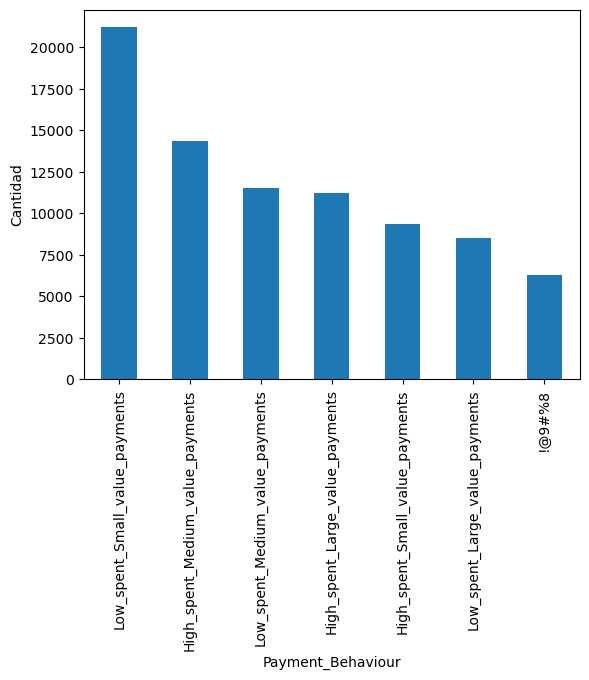

In [20]:
df_temp['Payment_Behaviour'].value_counts().plot.bar()
plt.ylabel('Cantidad')
plt.xlabel(df_temp['Payment_Behaviour'].name)
plt.show()

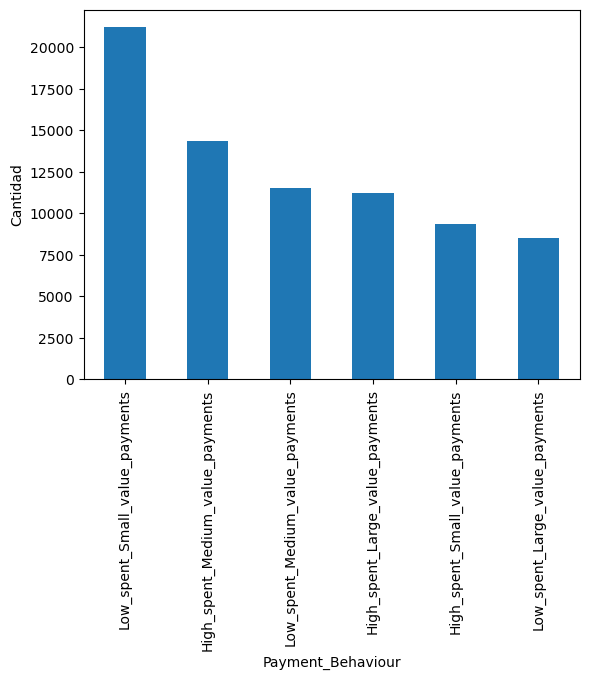

In [21]:
# se elimina faltantes de comportamiento de pago debido a que son particulares a cada cliente. CCA
df_temp = df_temp[df_temp['Payment_Behaviour'].str.contains('!@9#%8') == False]

df_temp['Payment_Behaviour'].value_counts().plot.bar()
plt.ylabel('Cantidad')
plt.xlabel(df_temp['Payment_Behaviour'].name)
plt.show()

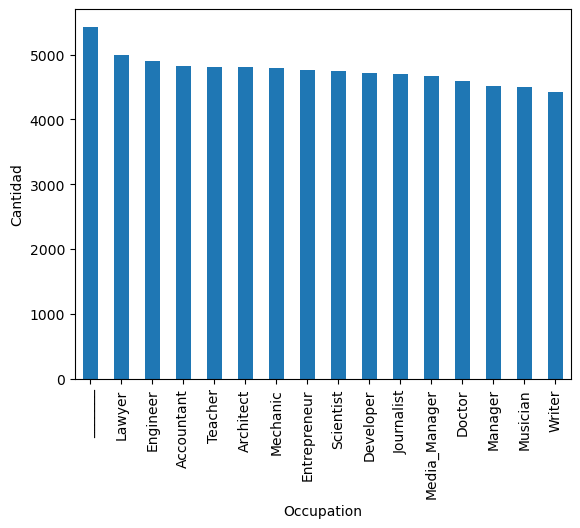

In [22]:
df_temp['Occupation'].value_counts().plot.bar()
plt.ylabel('Cantidad')
plt.xlabel(df_temp['Occupation'].name)
plt.show()

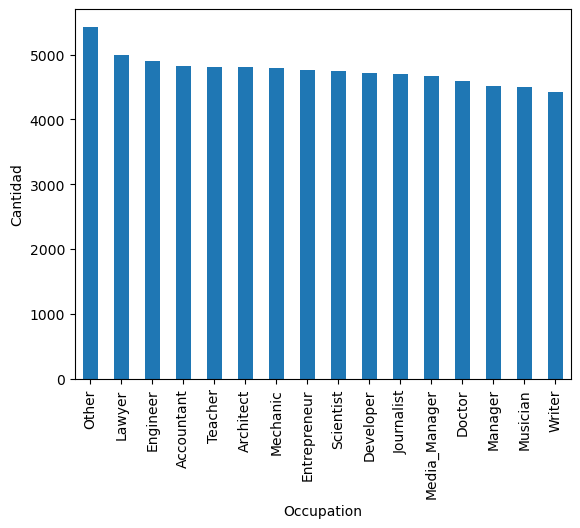

In [23]:
# Se crea categoria llamada faltante para la parte de ocupacion donde no se tiene informacion, esto debido a que se 
# desconoce el motivo por el que este vacio ya que puede ser que actualmente la persona este desempleada y haya adquirido un 
# credito antes de que estuviera desempleada por otro lado puede que sea una categoria para otras porfesiones que no esten listadas
df_temp['Occupation'] = df_temp['Occupation'].str.replace('_______', 'Other')
df_temp['Occupation'].value_counts().plot.bar()
plt.ylabel('Cantidad')
plt.xlabel(df_temp['Occupation'].name)
plt.show()

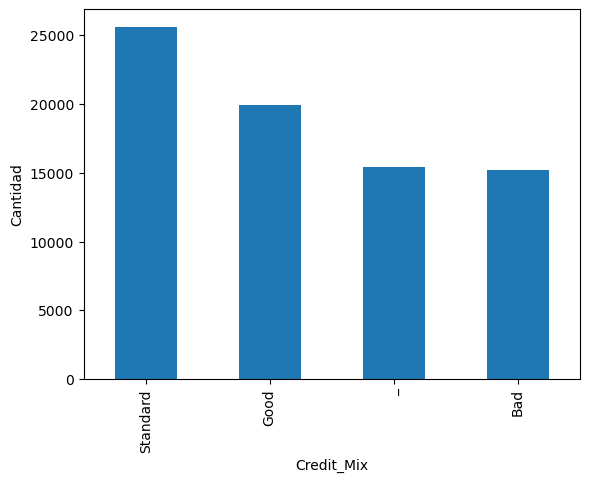

In [24]:
df_temp['Credit_Mix'].value_counts().plot.bar()
plt.ylabel('Cantidad')
plt.xlabel(df_temp['Credit_Mix'].name)
plt.show()

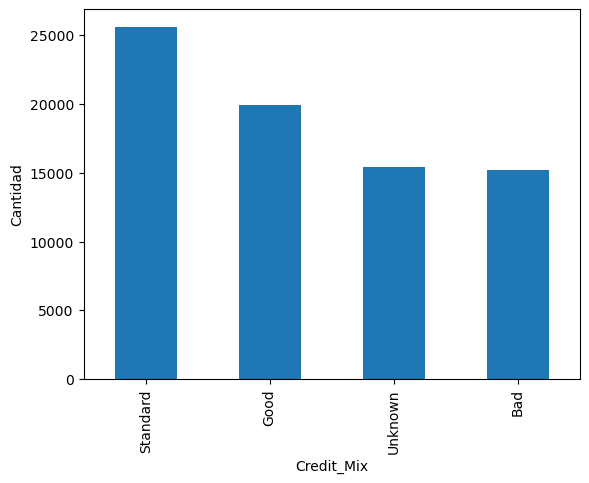

In [25]:
# En este caso se coloca como desconocido el tipo de credito que ha tenido con anterioridad dado que por la cantidad de datos 
# faltantes no se puede realizar una imputacion por moda o frecuencia en categorias, ademas depende del historial crediticio que
# tenga la persona, se desconoce regla del negocio sobre la forma en que evaluan creditos anteriores
df_temp['Credit_Mix'] = df['Credit_Mix'].str.replace('_', 'Unknown')
df_temp['Credit_Mix'].value_counts().plot.bar()
plt.ylabel('Cantidad')
plt.xlabel(df_temp['Credit_Mix'].name)
plt.show()

In [26]:
df_temp[catGen].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76209 entries, 79102 to 99983
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     76209 non-null  object
 1   Customer_ID            76209 non-null  object
 2   Month                  76209 non-null  object
 3   SSN                    76209 non-null  object
 4   Occupation             76209 non-null  object
 5   Credit_Mix             76209 non-null  object
 6   Payment_of_Min_Amount  76209 non-null  object
 7   Payment_Behaviour      76209 non-null  object
 8   Credit_Score           76209 non-null  object
dtypes: object(9)
memory usage: 5.8+ MB


### Imputacion de variables numericas

In [27]:
#Se determina variables con valores nulos o vacios
numNull=[col for col in df_temp.columns if ((df_temp[col].isnull().mean()!=0 )and (df_temp[col].dtypes!='object'))]
df_temp[numNull].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76209 entries, 79102 to 99983
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Num_Credit_Inquiries     74734 non-null  float64
 1   Amount_invested_monthly  72789 non-null  float64
 2   Monthly_Balance          74056 non-null  float64
dtypes: float64(3)
memory usage: 2.3 MB


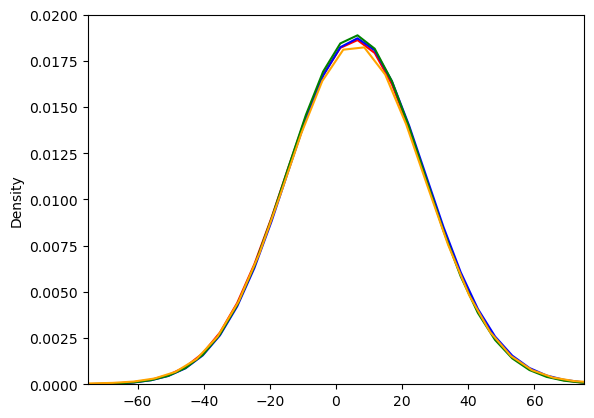

In [28]:
#Comprobando imputacion de media, mediana o distribucion normal
df_temp['Num_Credit_Inquiries_mean']=np.round(df_temp['Num_Credit_Inquiries'].fillna(df_temp['Num_Credit_Inquiries'].mean()))
df_temp['Num_Credit_Inquiries_median']=np.round(df_temp['Num_Credit_Inquiries'].fillna(df_temp['Num_Credit_Inquiries'].median()))

rng = np.random.default_rng(0)
filler = pd.Series(rng.normal(loc=df_temp['Num_Credit_Inquiries'].mean(), scale=df_temp['Num_Credit_Inquiries'].std(), size=len(df)))
df_temp['Num_Credit_Inquiries_dist'] = df['Num_Credit_Inquiries'].fillna(filler)

#grafica de densidad
df_temp['Num_Credit_Inquiries'].plot.density(color='red',label='Original')
df_temp['Num_Credit_Inquiries_mean'].plot.density(color='blue',label='Media')
df_temp['Num_Credit_Inquiries_median'].plot.density(color='green',label='Mediana')
df_temp['Num_Credit_Inquiries_dist'].plot.density(color='orange',label='Distribucion')
plt.axis([-75, 75, 0, 0.02])
plt.show()

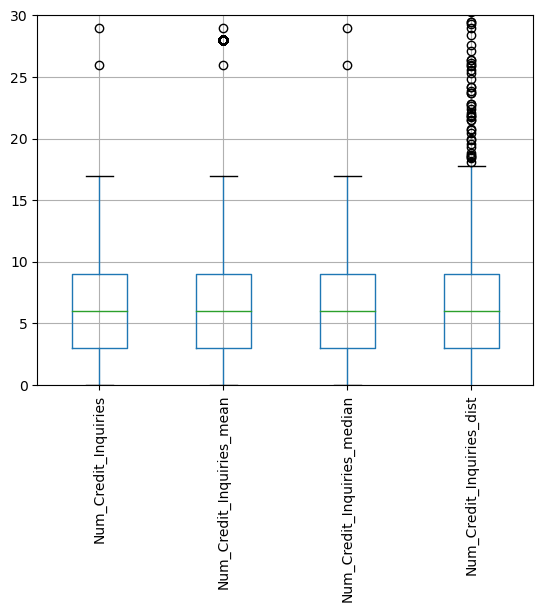

In [29]:
df_temp[['Num_Credit_Inquiries','Num_Credit_Inquiries_mean','Num_Credit_Inquiries_median','Num_Credit_Inquiries_dist']].boxplot()
plt.ylim(0, 30)
plt.xticks(rotation=90)
plt.show()

Se concluye que la mejor imputacion es la que se realiza a traves de la media pues no afecta significativamente la distribucion original

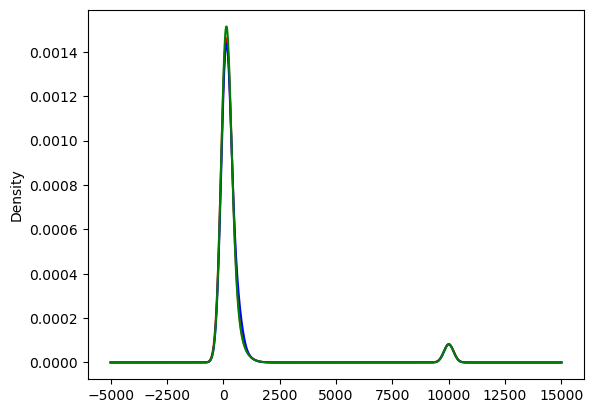

In [30]:
#Comprobando imputacion de media, mediana o distribucion normal
df_temp['Amount_invested_monthly_mean']=np.round(df_temp['Amount_invested_monthly'].fillna(df_temp['Amount_invested_monthly'].mean()))
df_temp['Amount_invested_monthly_median']=np.round(df_temp['Amount_invested_monthly'].fillna(df_temp['Amount_invested_monthly'].median()))

#grafica de densidad
df_temp['Amount_invested_monthly'].plot.density(color='red',label='Original')
df_temp['Amount_invested_monthly_mean'].plot.density(color='blue',label='Media')
df_temp['Amount_invested_monthly_median'].plot.density(color='green',label='Mediana')

plt.show()

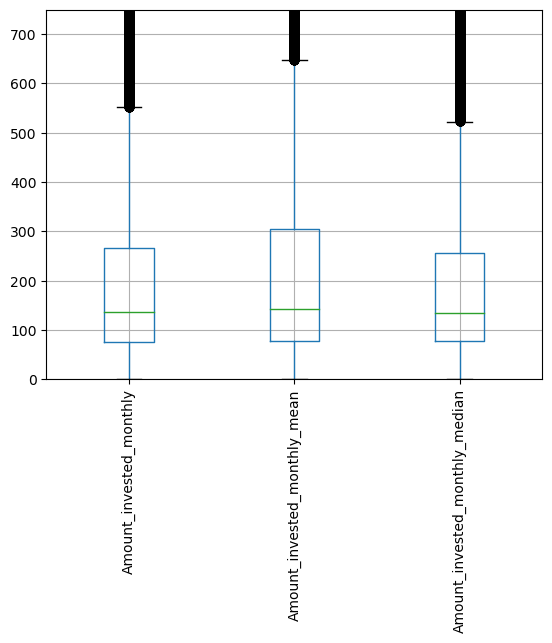

In [31]:
df_temp[['Amount_invested_monthly','Amount_invested_monthly_mean','Amount_invested_monthly_median']].boxplot()
plt.xticks(rotation=90)
plt.ylim(0, 750)
plt.show()

En este casso se concluye que la imputacion por la mediana es la mejor opción, dado que se puede observar que los valores se encuentran distribuidos más similarmente a la distribución original

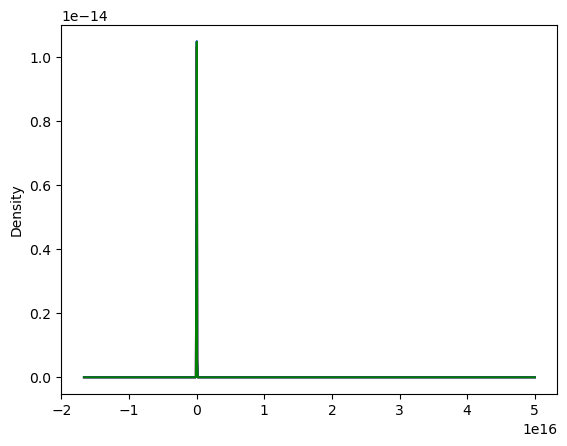

In [32]:
#Comprobando imputacion de media, mediana o distribucion normal
df_temp['Monthly_Balance_mean']=np.round(df_temp['Monthly_Balance'].fillna(df_temp['Monthly_Balance'].mean()))
df_temp['Monthly_Balance_median']=np.round(df_temp['Monthly_Balance'].fillna(df_temp['Monthly_Balance'].median()))

#grafica de densidad
df_temp['Monthly_Balance'].plot.density(color='red',label='Original')
df_temp['Monthly_Balance_mean'].plot.density(color='blue',label='Media')
df_temp['Monthly_Balance_median'].plot.density(color='green',label='Mediana')

plt.show()

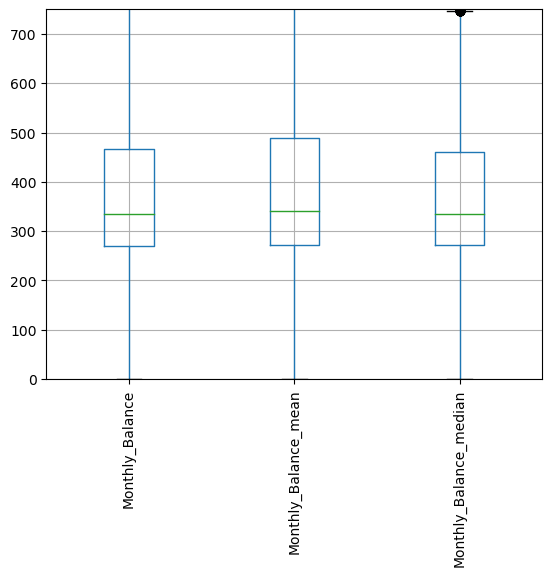

In [33]:
df_temp[['Monthly_Balance','Monthly_Balance_mean','Monthly_Balance_median']].boxplot()
plt.xticks(rotation=90)
plt.ylim(0, 750)
plt.show()

La imputacion optima seria de la media pues es la que tiene menor cantidad de efectos sobre distribucion original

#### CONCLUSIONES
- Imputacion categorica de forma que se coloca el dato como faltante
- CCA para el caso de comportamiento de credito
- Num_Credit_Inquiries mejor imputacion con media
- Amount_invested_monthly mejor imputacion con mediana
- Monthly_Balance mejor imputacion con media


## Tratamiento de Outliers

In [34]:
def plotDistBoxQQ(dataset,col):
# Descripcion: Muestra graficas distribucion, boxplot, QQ-Plot para detectar Outliers
# input: dataset->pandas.dataframe, col->string con nombre de columna
# output: visualizacion de plots
    plt.figure(figsize=(20,6))
    plt.subplot(1,3,1)
    sns.distplot(dataset[col], bins=30)
    plt.title("Histograma y Densidad")

    plt.subplot(1,3,2)
    sns.boxplot(y=dataset[col])
    plt.title('Boxplot')

    plt.subplot(1,3,3)
    stats.probplot(dataset[col],dist='norm',plot=plt)
    plt.title("Q-Q plot")

In [35]:
def getColumnTypes(dataset):
# Descripcion: Esta funcion extrae el tipo de dominio de las columnas de un dataset
# Entradas: Pandas Dataframe
# Salida: Tupla con arreglo que contiene nombre de columnas
    continuas=[]
    discretas=[]
    categoricas=[]
    for col in dataset.columns:
        if((dataset[col].dtype=='int64')or(dataset[col].dtype=='float64')):
            if(len(dataset[col].unique())>30):
                continuas.append(col)
            else:
                discretas.append(col)
        else:
            categoricas.append(col)
    return discretas, continuas, categoricas

In [36]:
discretas, continuas, categoricas=getColumnTypes(df_temp)
print(f'continuas \n {continuas}')
print(f'discretas \n {discretas}')
print(f'categoricas \n {categoricas}')

continuas 
 ['Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Delay_from_due_date', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance', 'Num_Credit_Inquiries_mean', 'Num_Credit_Inquiries_median', 'Num_Credit_Inquiries_dist', 'Amount_invested_monthly_mean', 'Amount_invested_monthly_median', 'Monthly_Balance_mean', 'Monthly_Balance_median']
discretas 
 []
categoricas 
 ['ID', 'Customer_ID', 'Month', 'Age', 'SSN', 'Occupation', 'Num_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']


c:\Users\50259\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\50259\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\50259\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

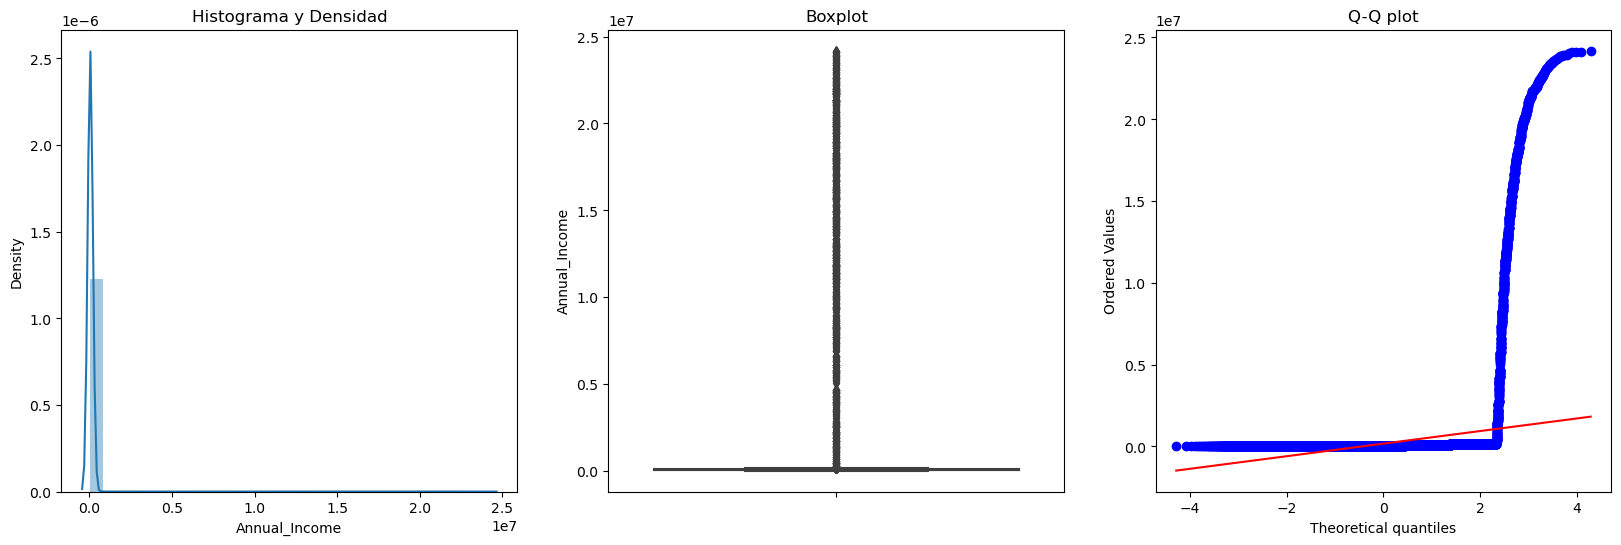

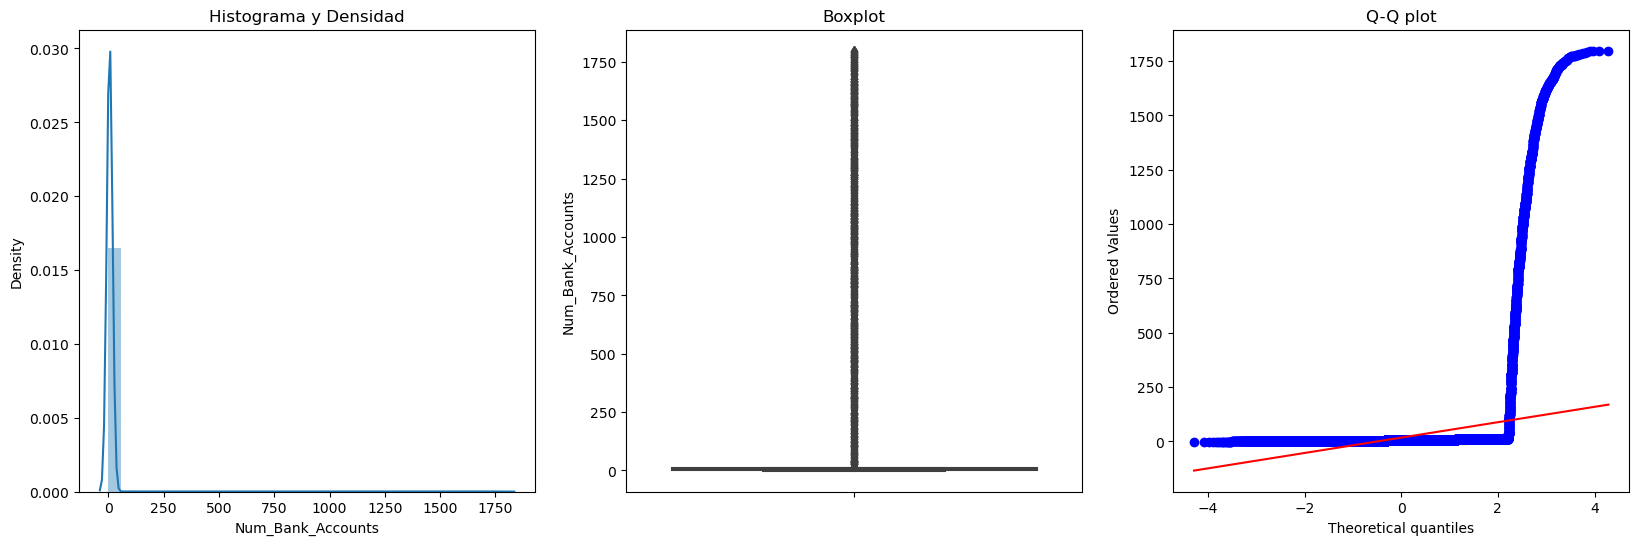

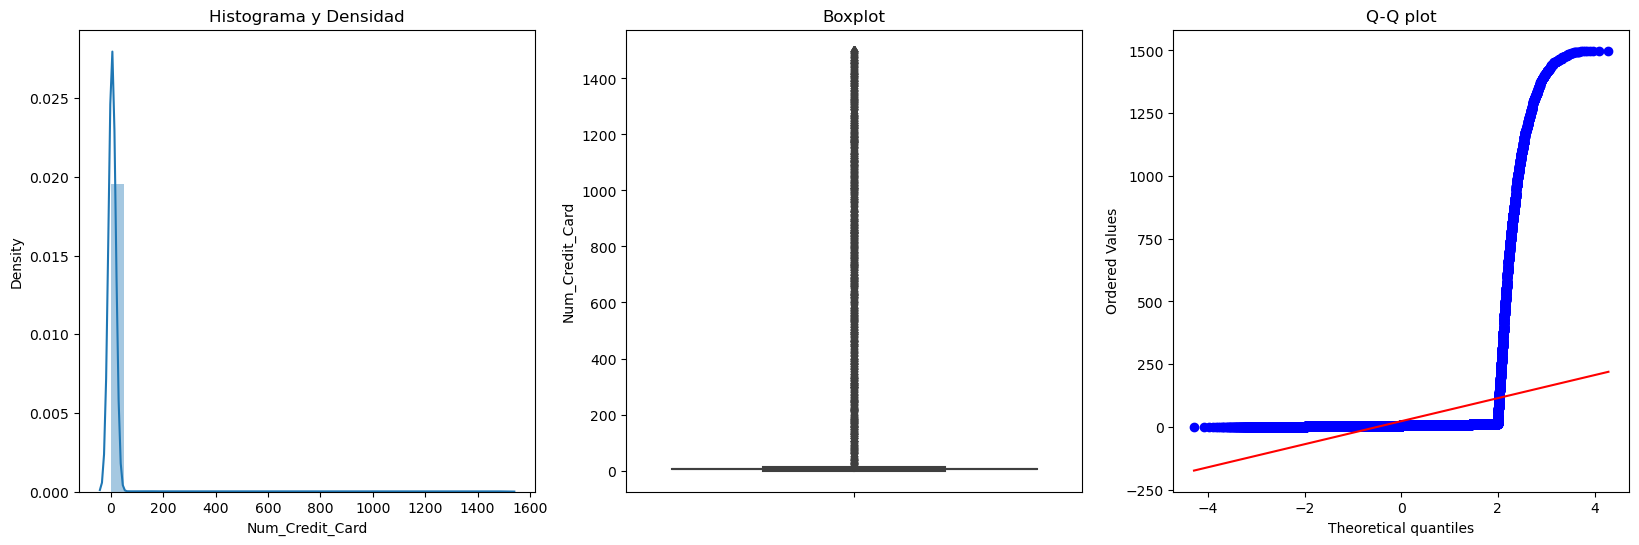

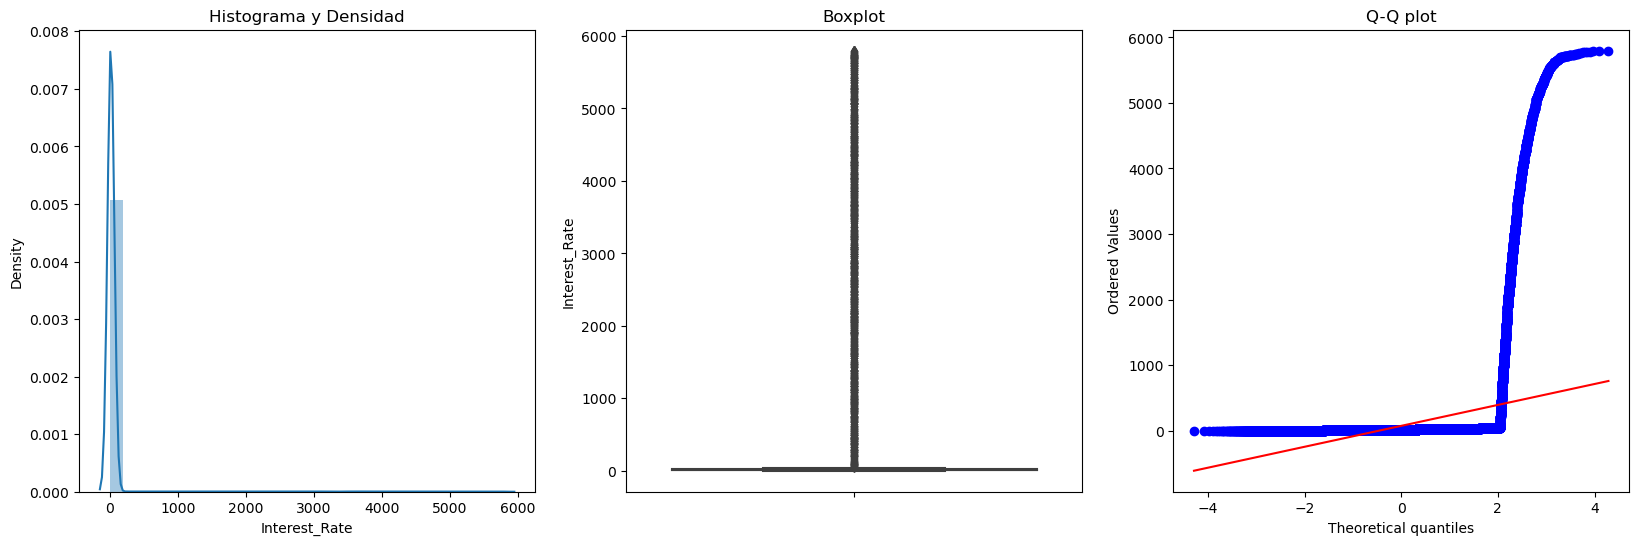

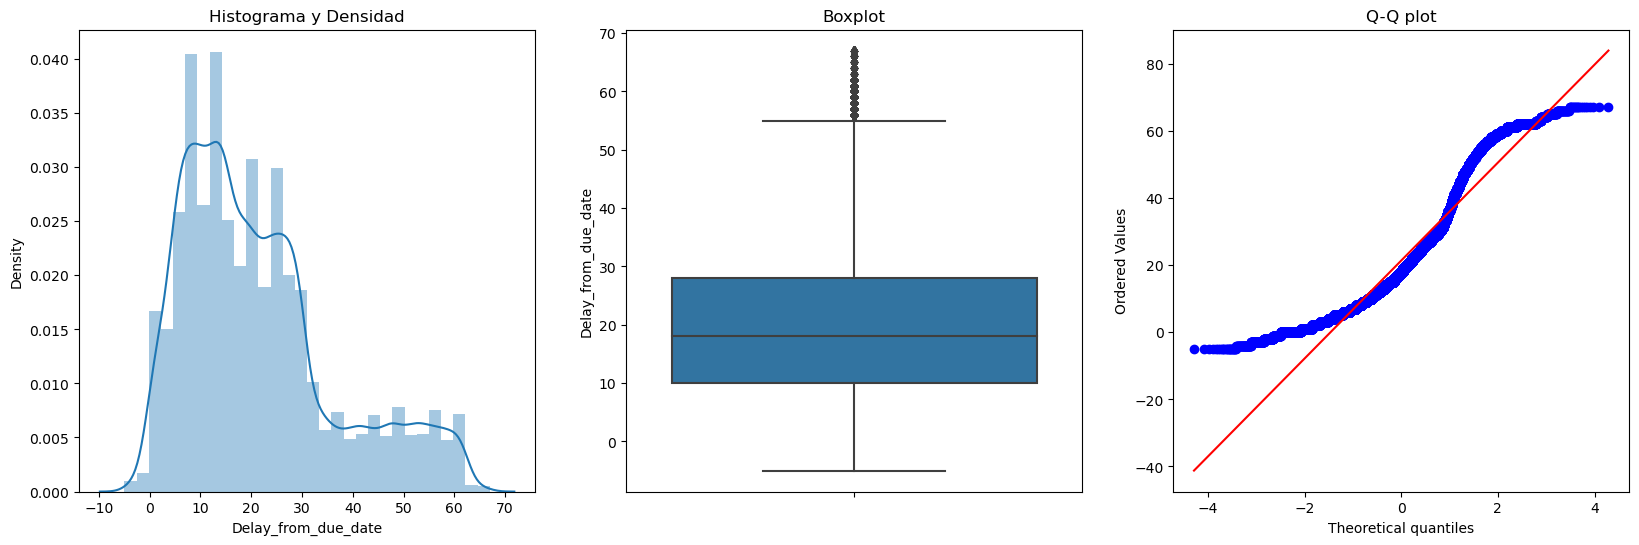

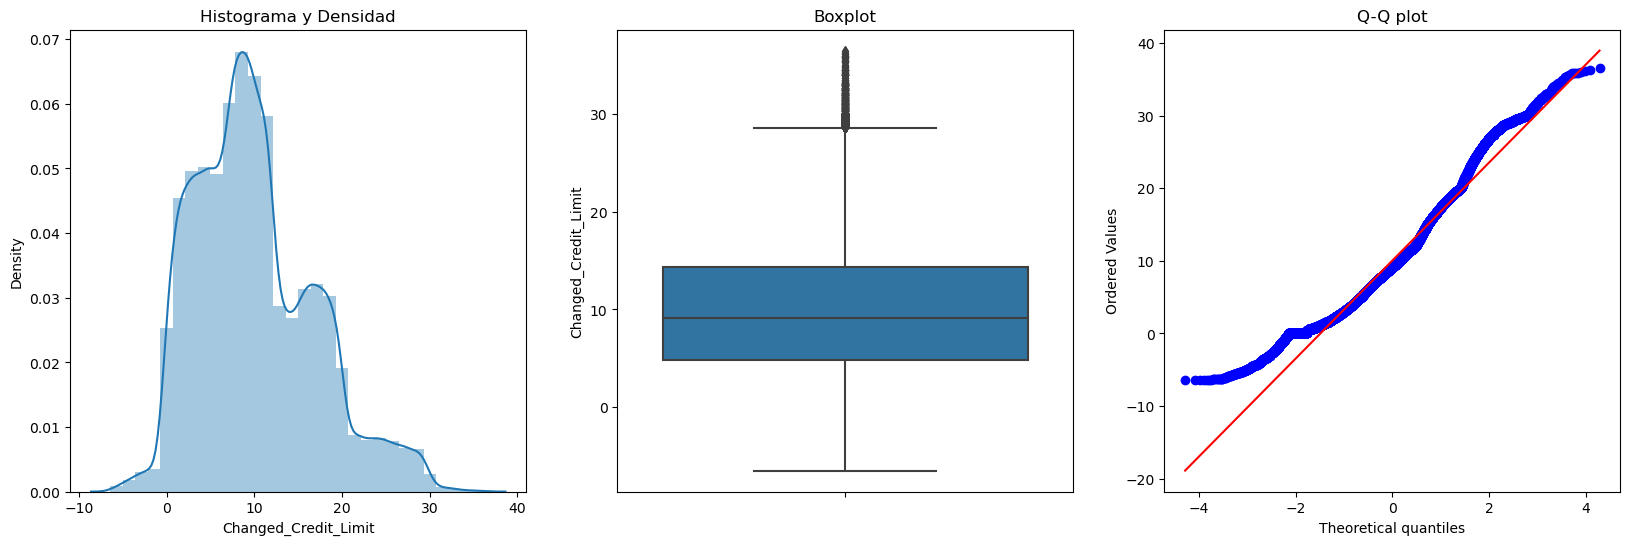

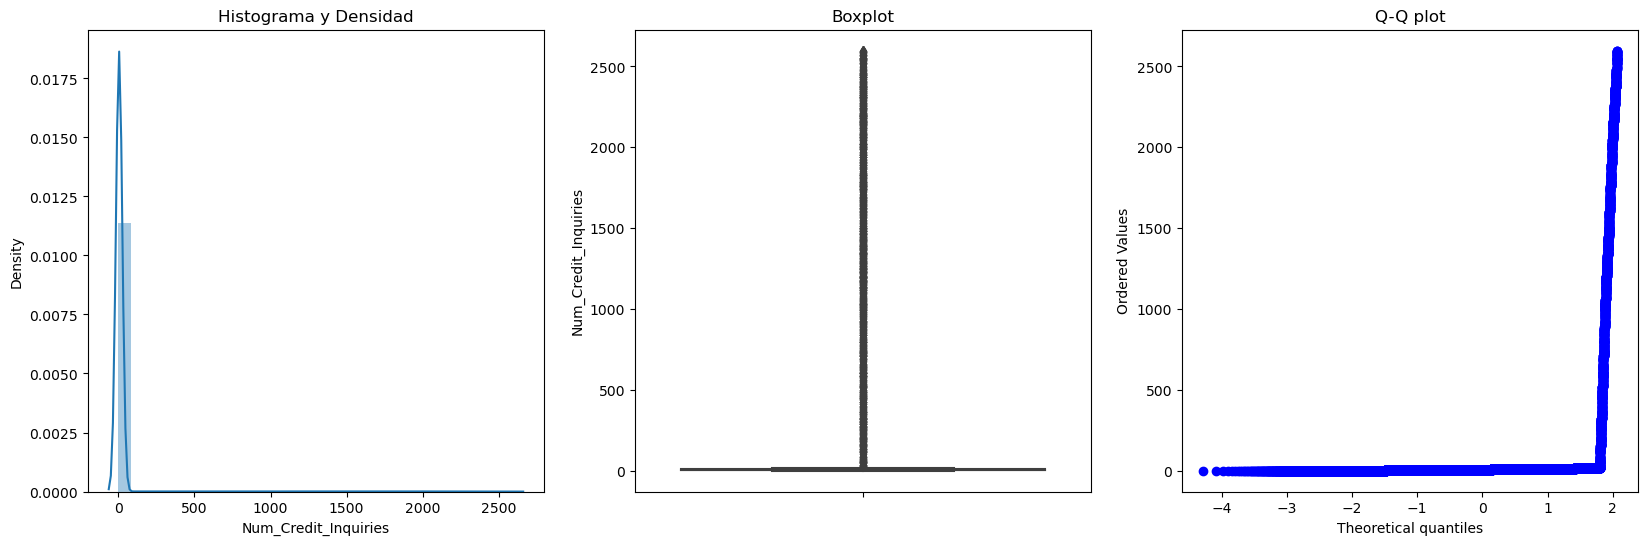

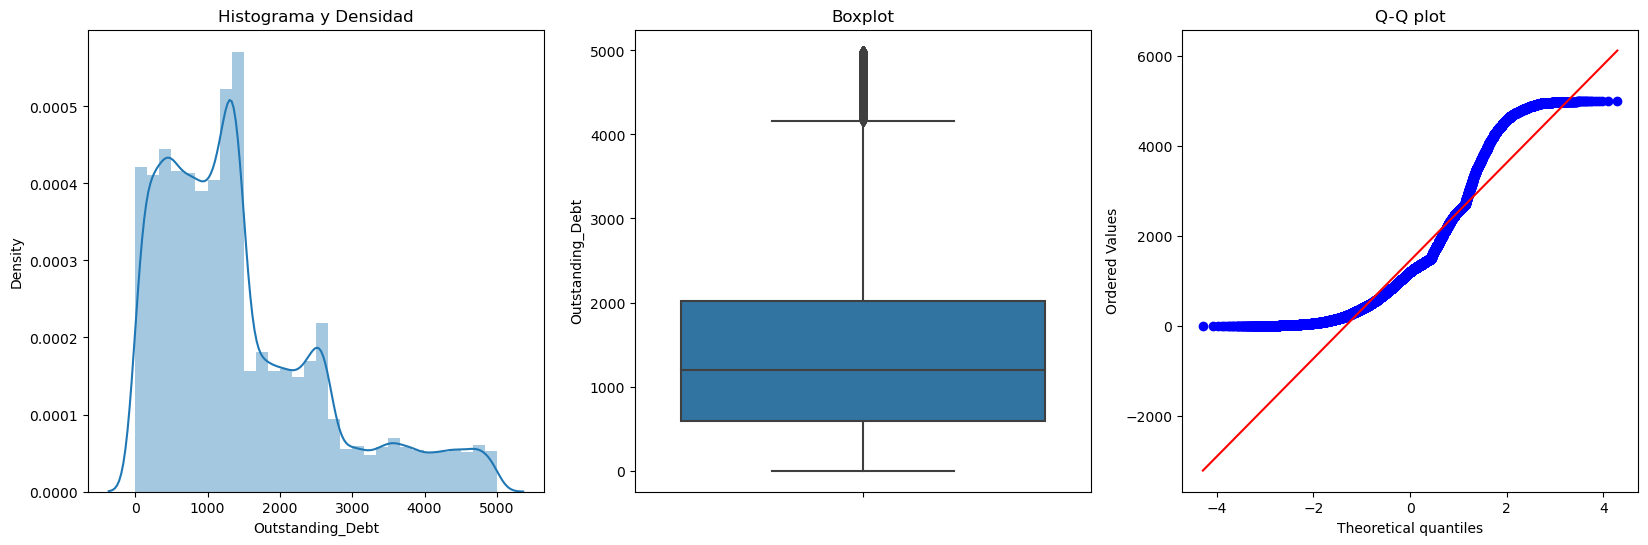

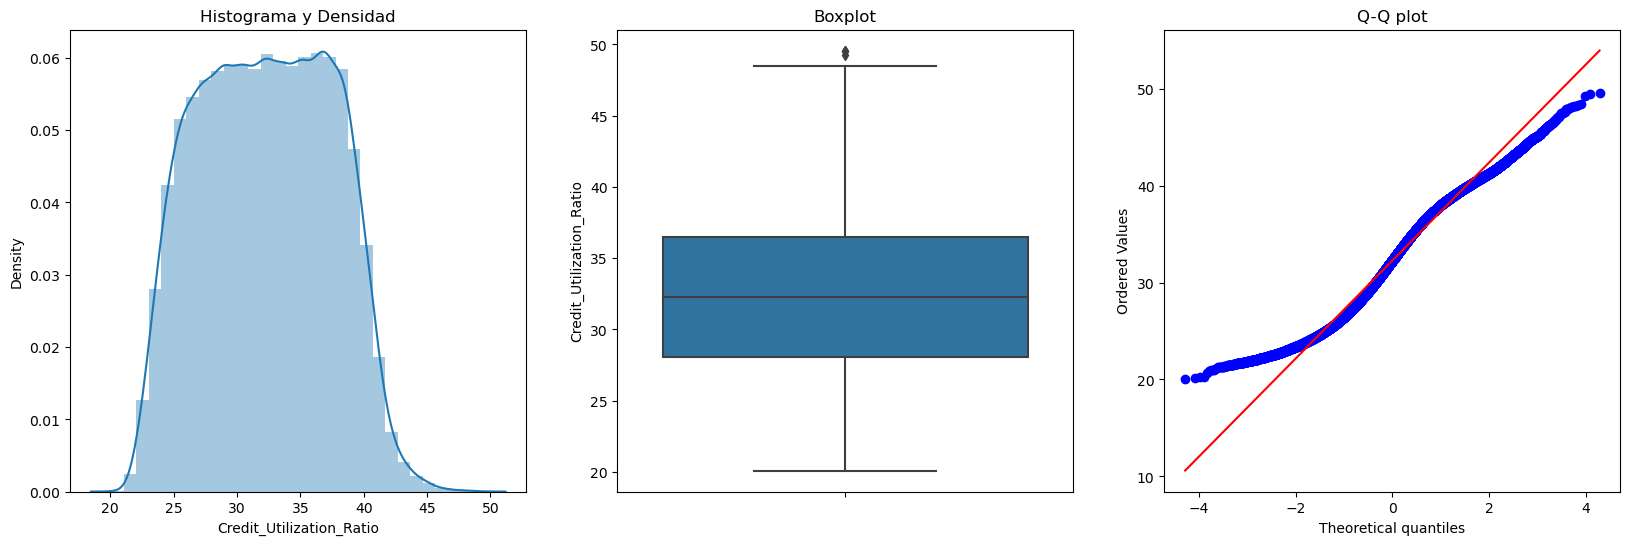

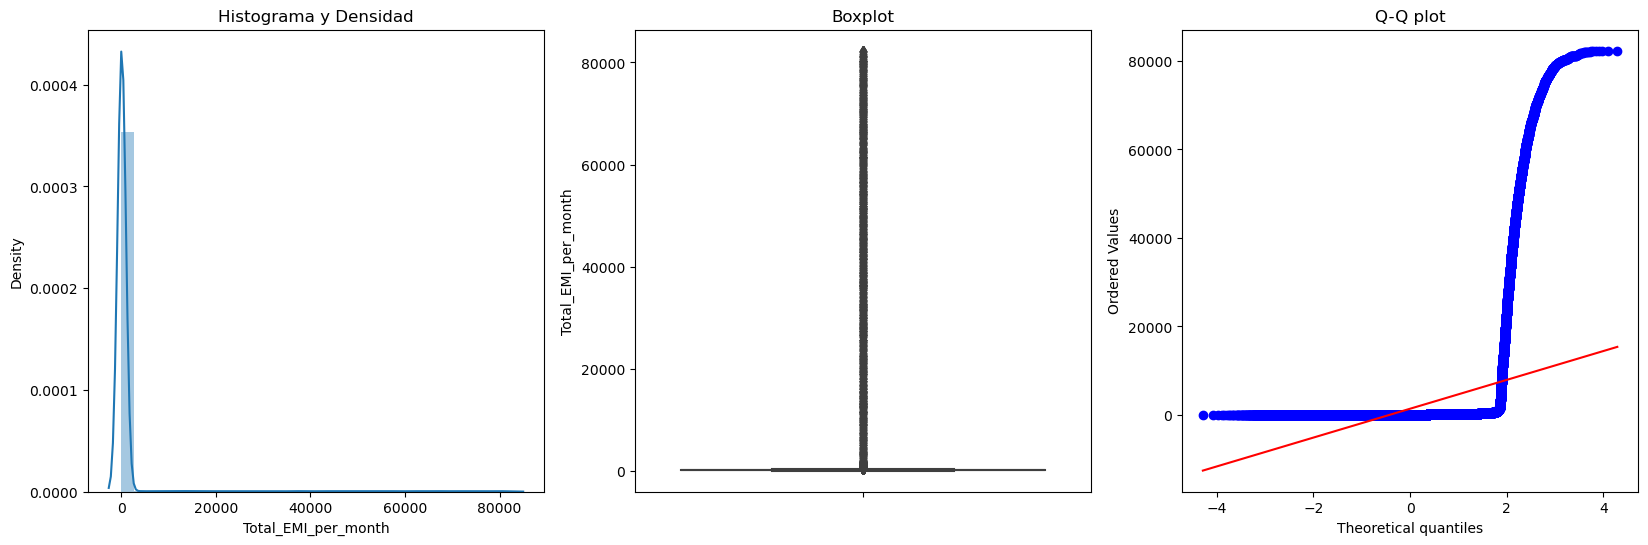

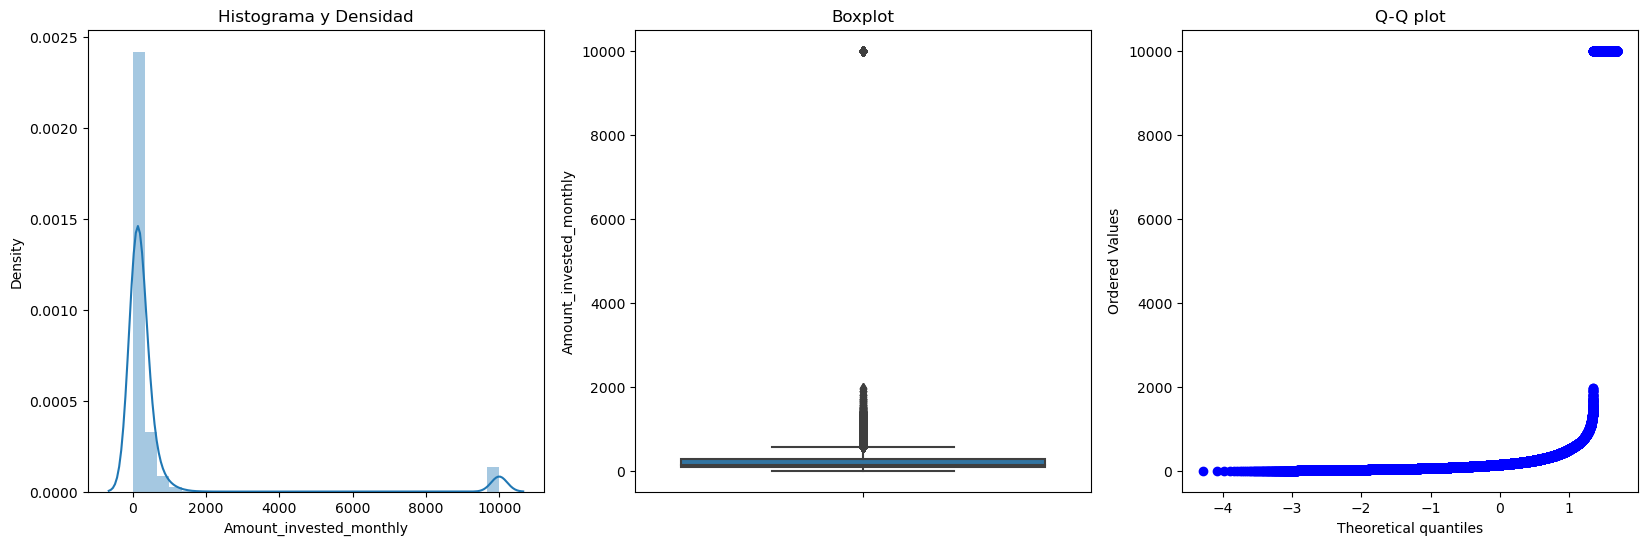

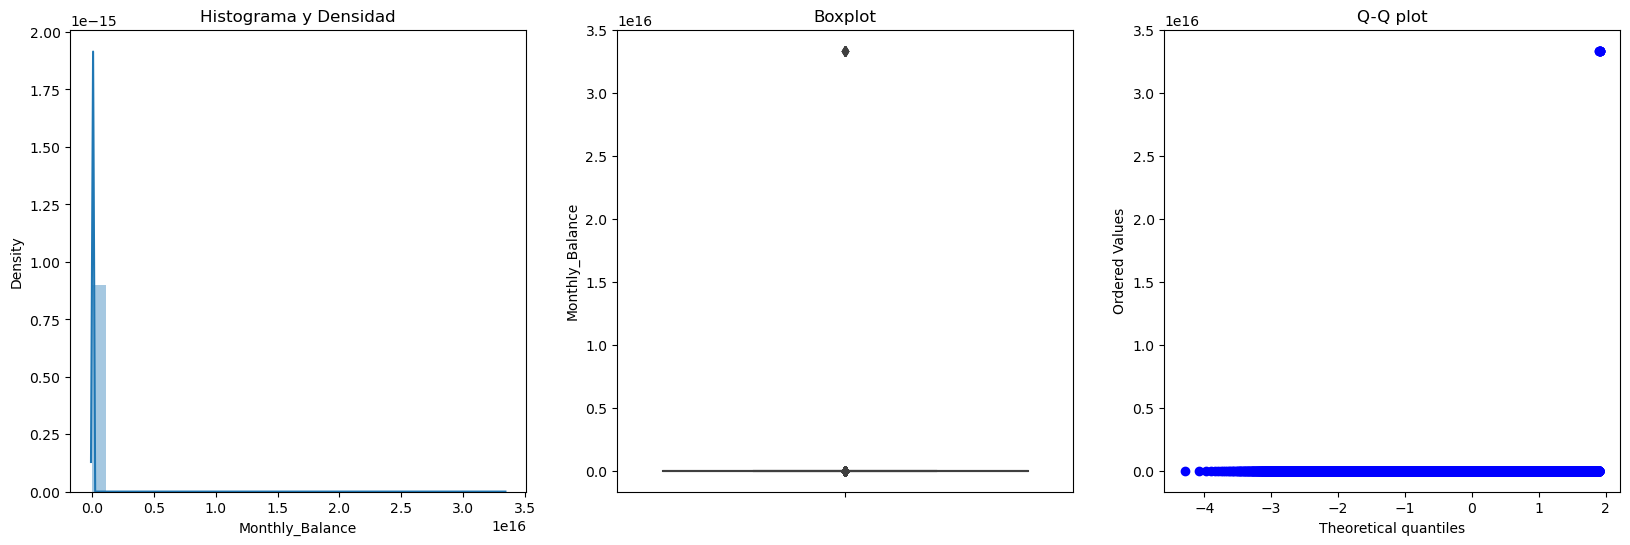

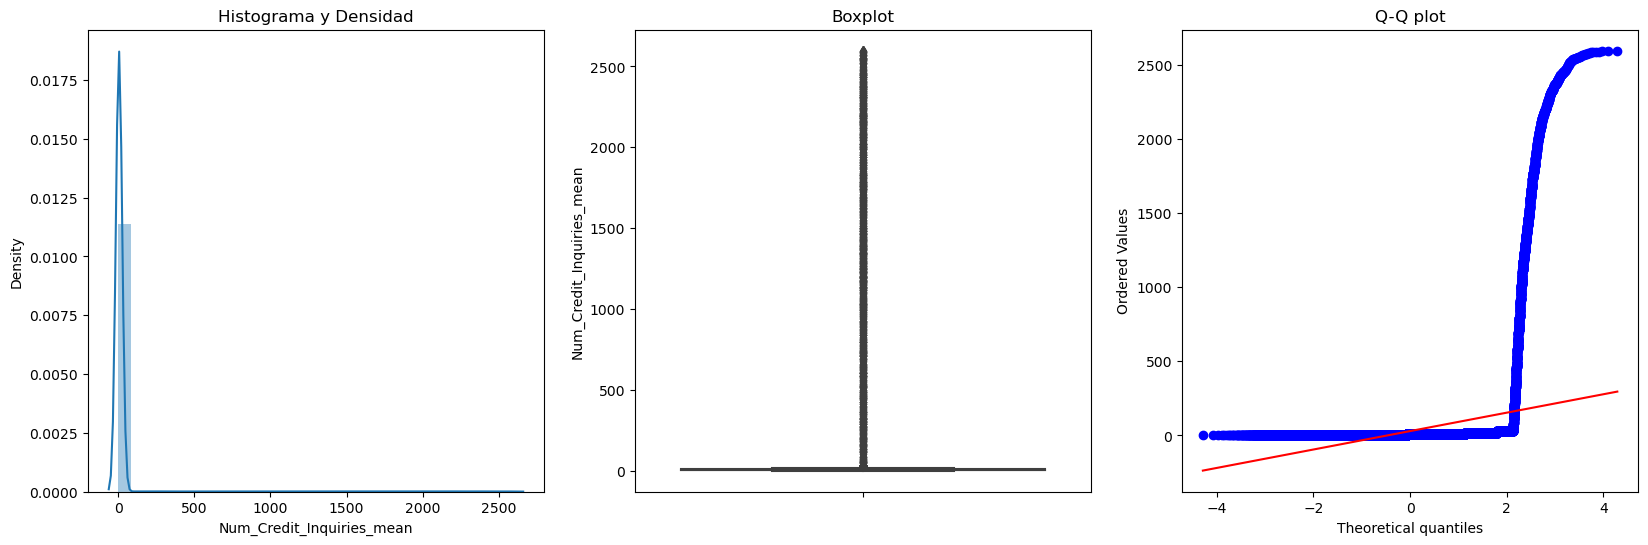

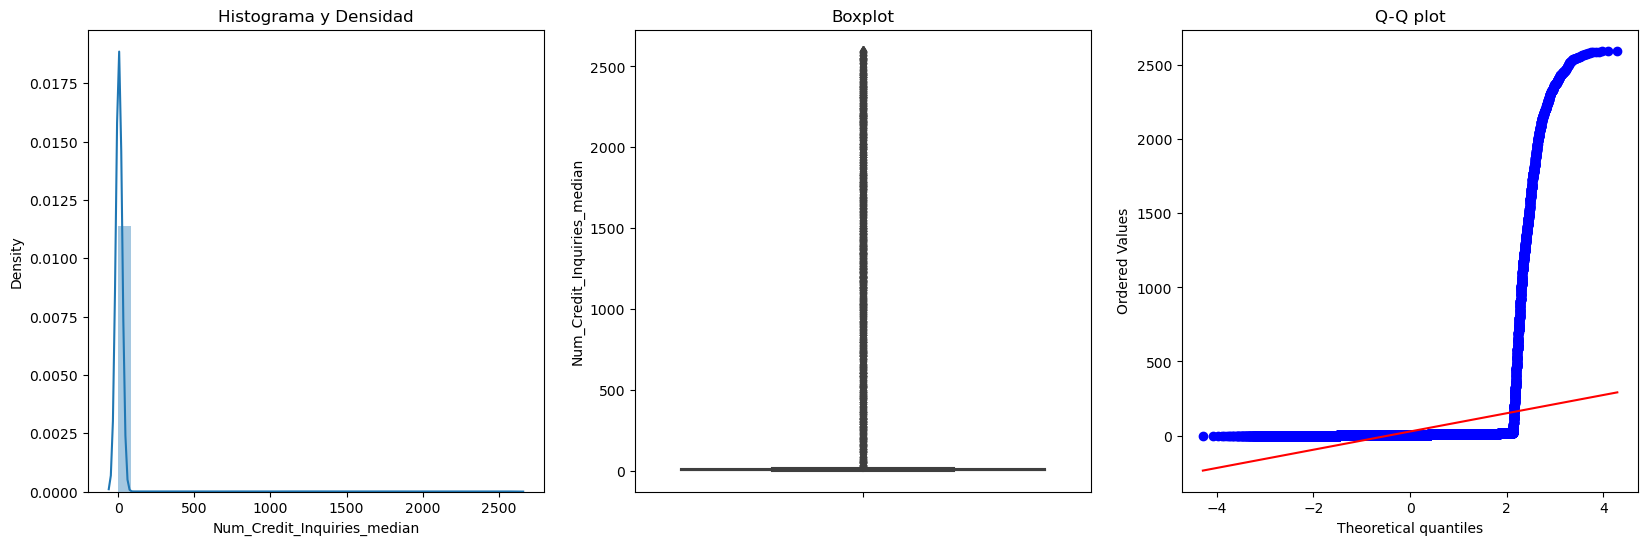

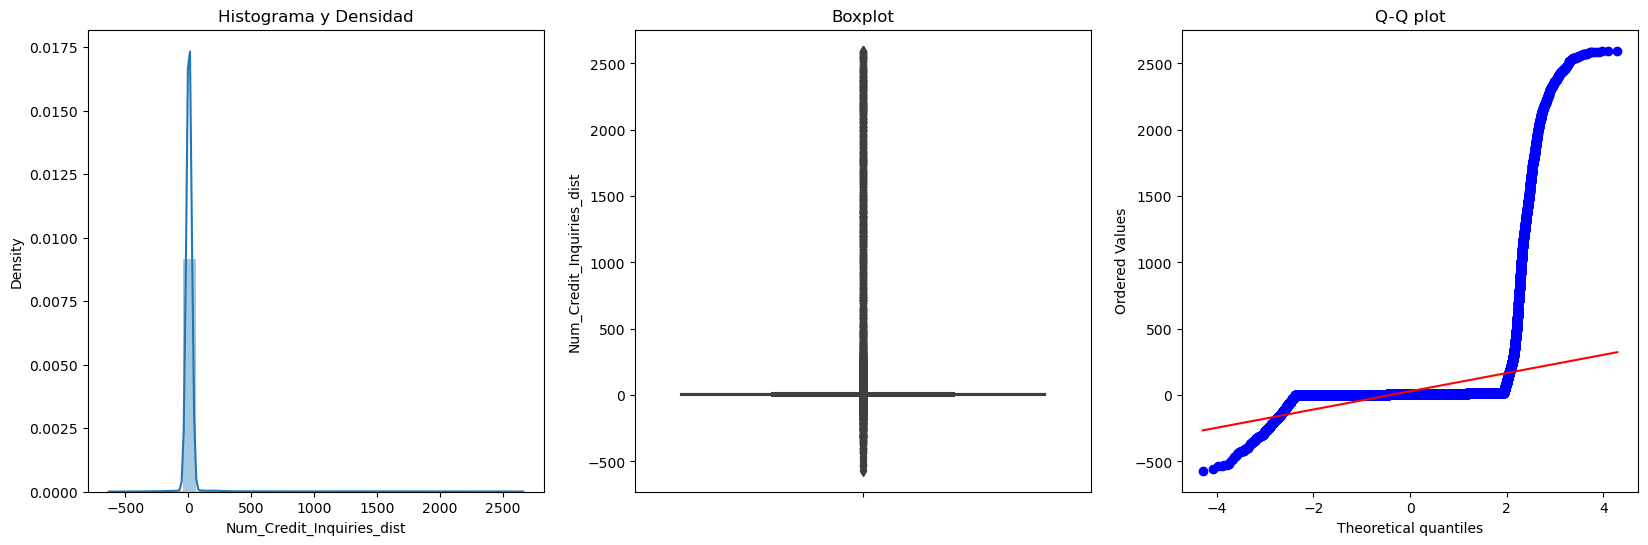

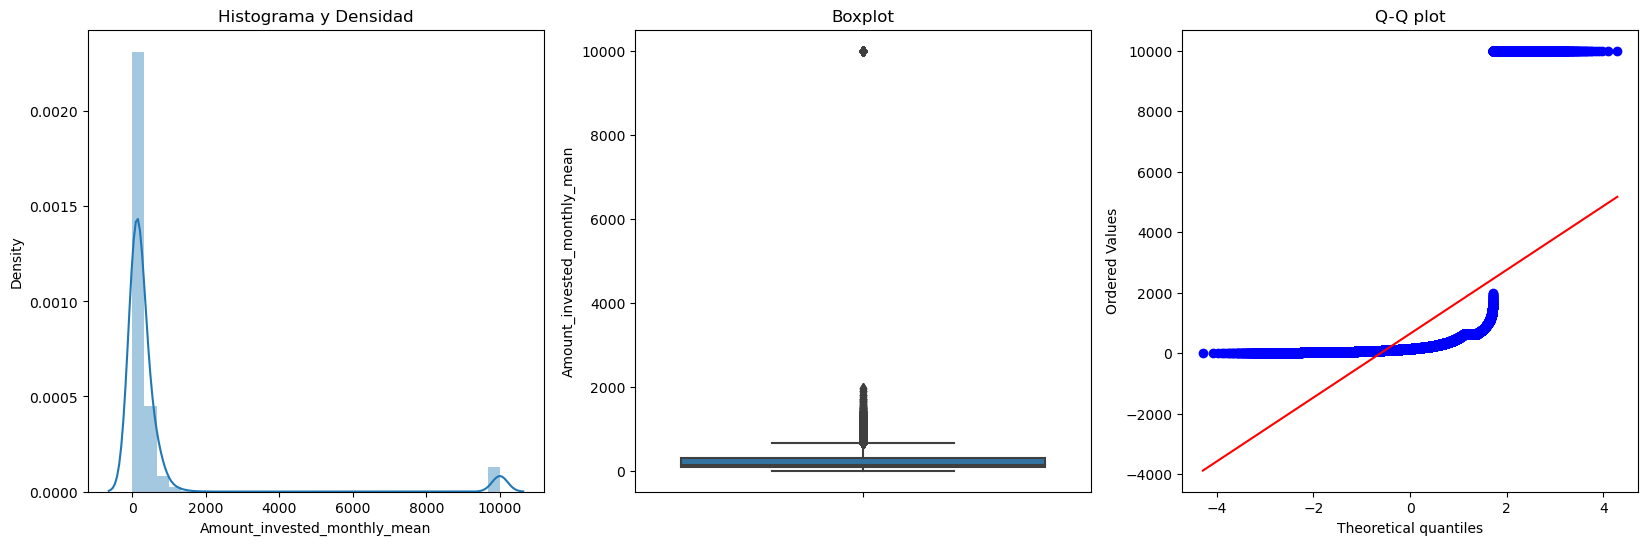

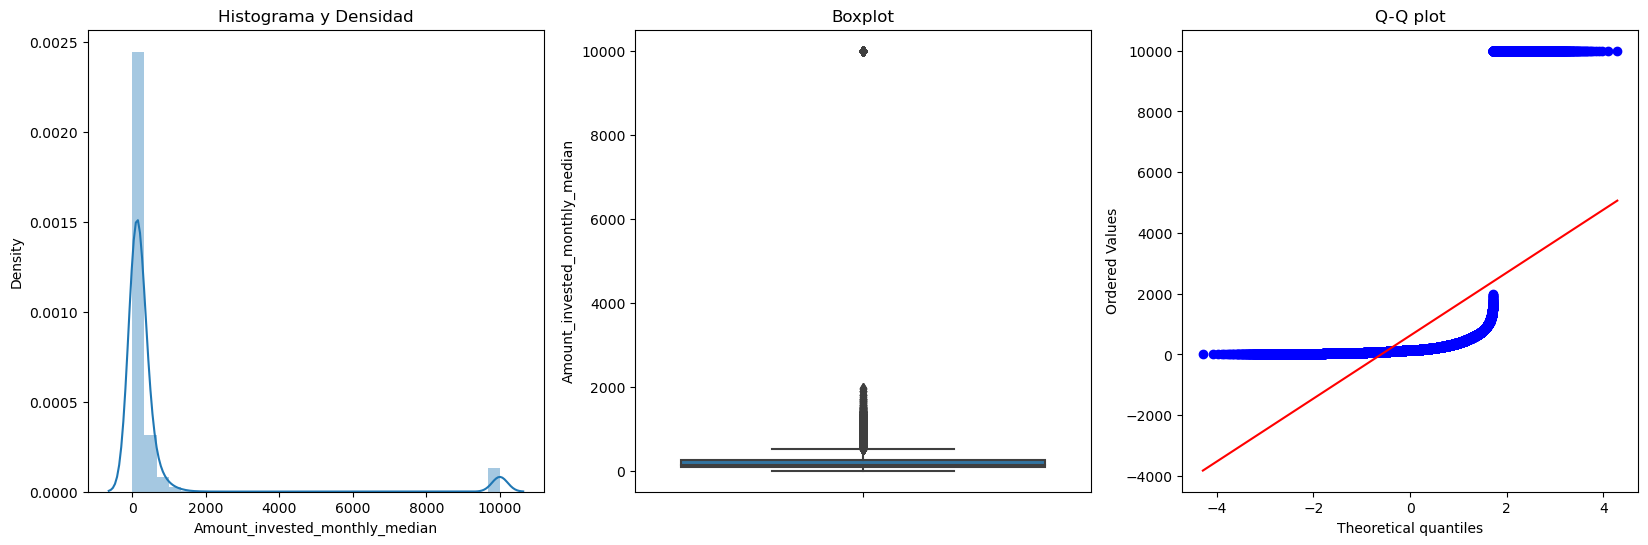

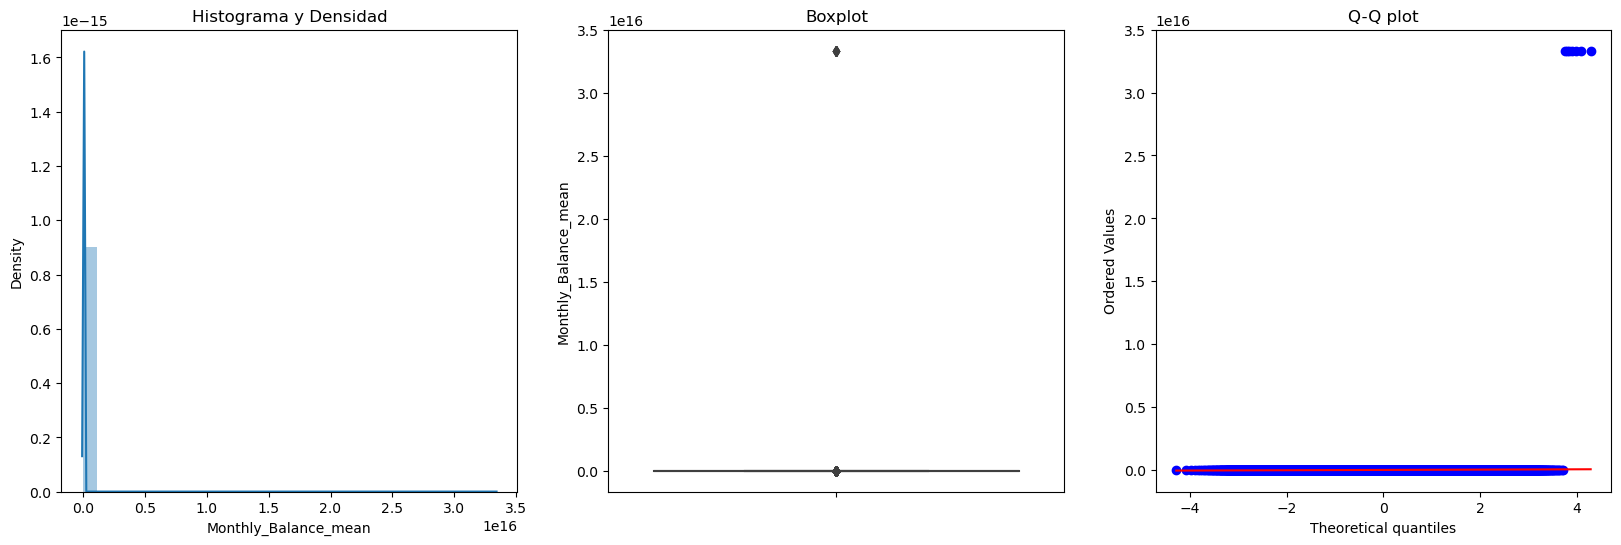

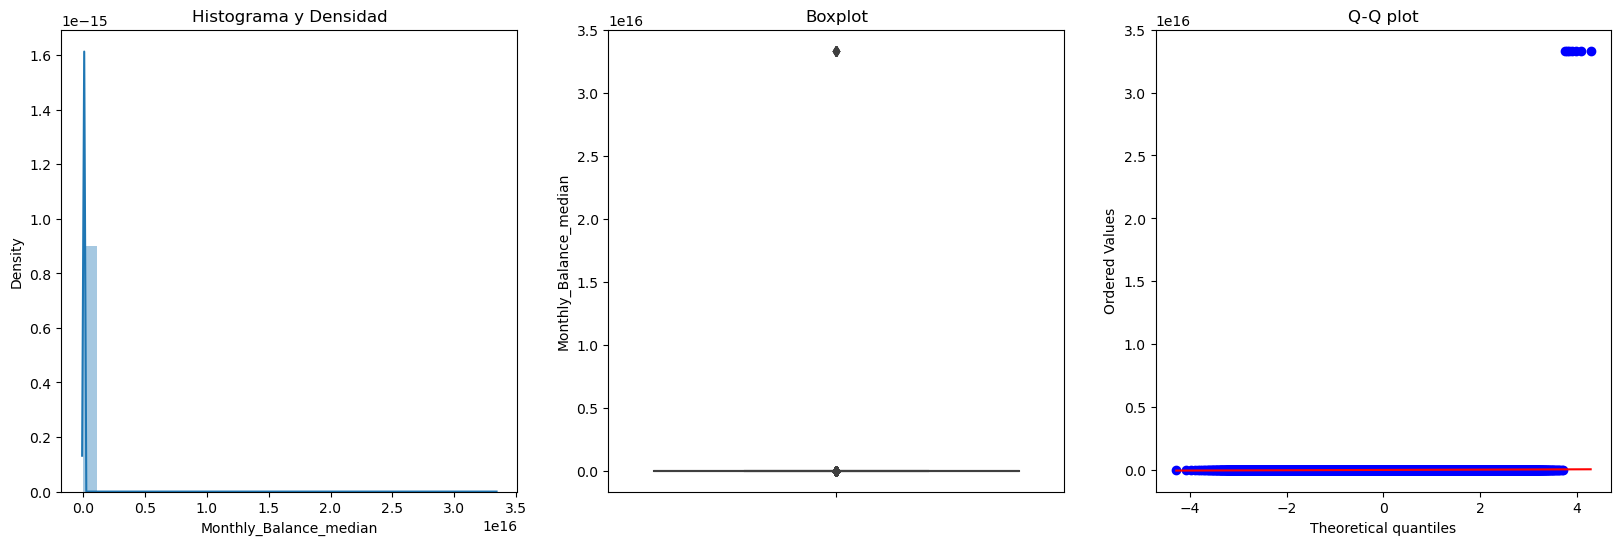

In [37]:
for c in continuas:
    plotDistBoxQQ(df_temp,c)

In [38]:

def detectOutliersLimits (dataset,col):
# Descripcion: calcula limites superiores e inferiores para identificar outliers
# input: dataset->dataframe pandas
# output: tupla de floats con los limites
    IQR=dataset[col].quantile(0.75)-dataset[col].quantile(0.25)
    LI=dataset[col].quantile(0.25)-(IQR*1.75)
    LS=dataset[col].quantile(0.75)+(IQR*1.75)

    return LI,LS

In [39]:
#aplicando transformar outliers a limites 
def Capping(data,colist):
    for c in colist:
        LI,LS=detectOutliersLimits(data,c)
        if '_code' in c:
            data[c]=data[c]
        else:
            data[c]=np.where(data[c]>LS,LS,
                                    np.where(data[c]<LI,LI,data[c]))

In [40]:
continuas=['Annual_Income', 'Interest_Rate',
 'Delay_from_due_date',
 'Changed_Credit_Limit',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Total_EMI_per_month',
 'Amount_invested_monthly_median',
 'Monthly_Balance_mean','Num_Bank_Accounts','Num_Credit_Card','Num_Credit_Inquiries', 'Num_Credit_Inquiries_mean']


#aplicar tratamiento a outliers
Capping(df_temp,continuas)

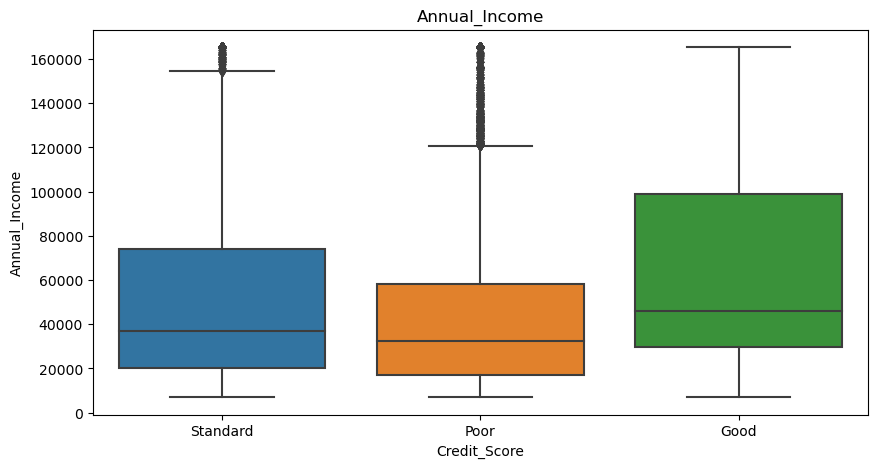

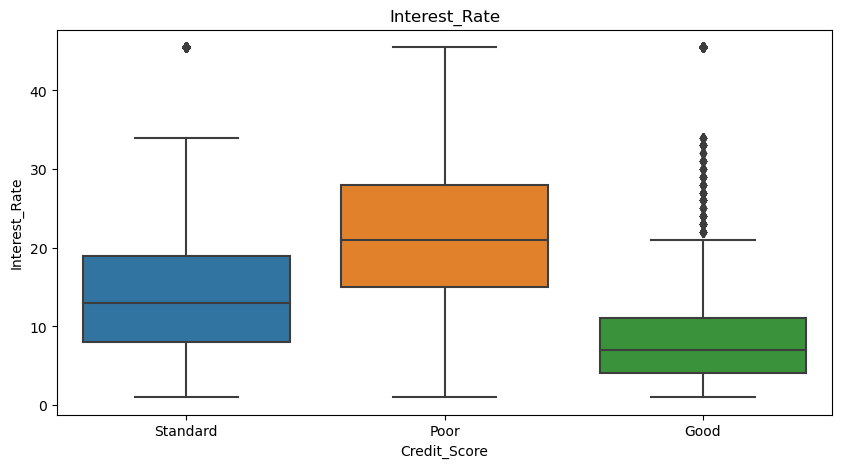

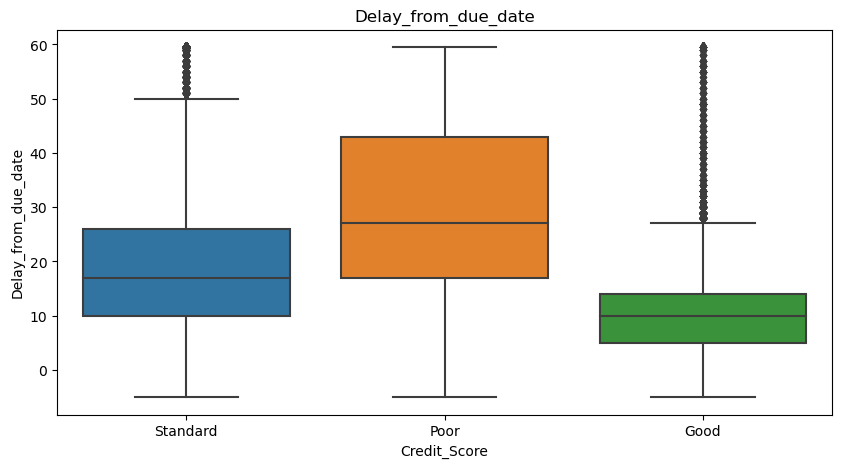

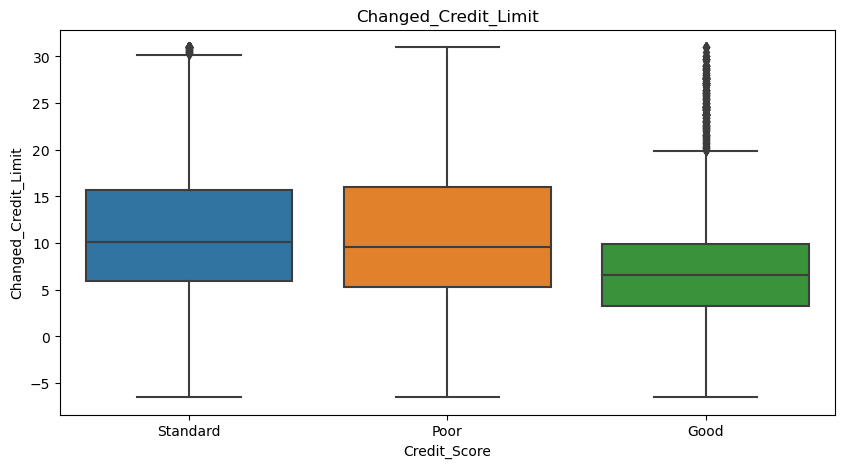

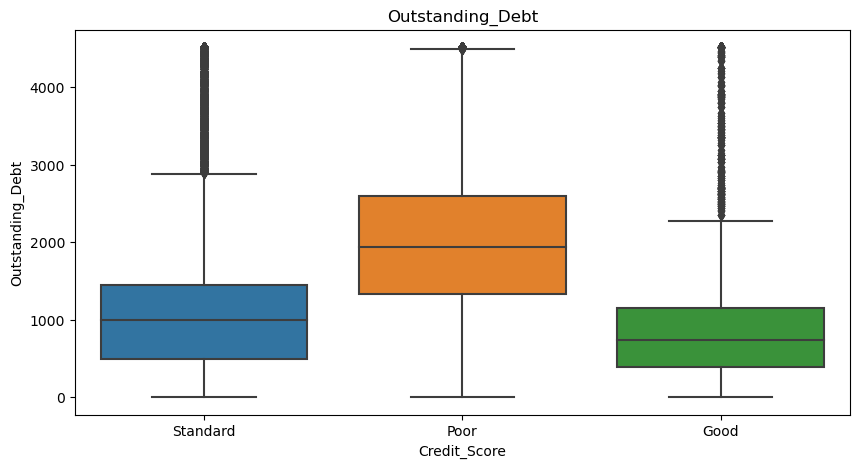

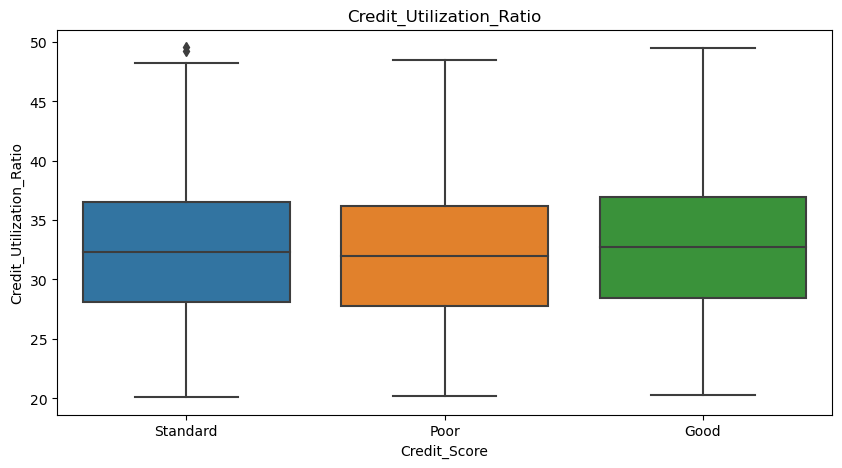

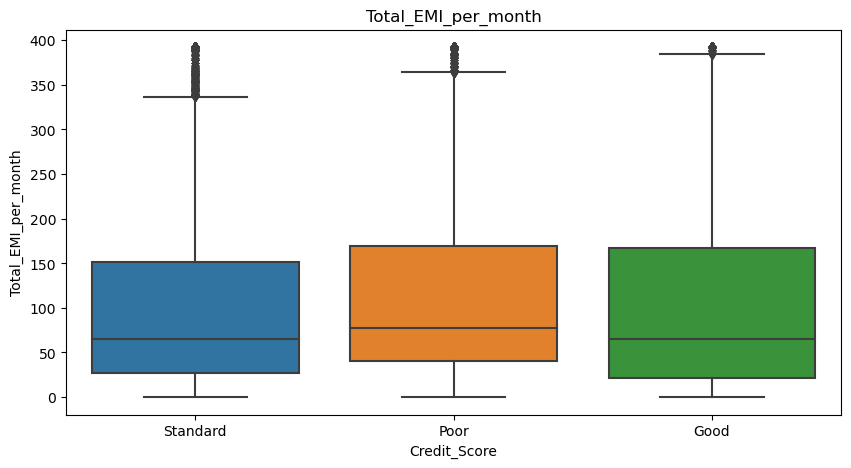

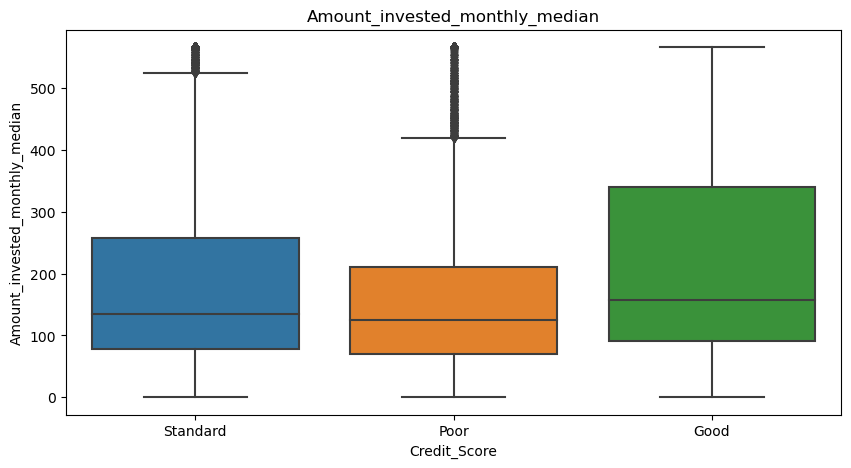

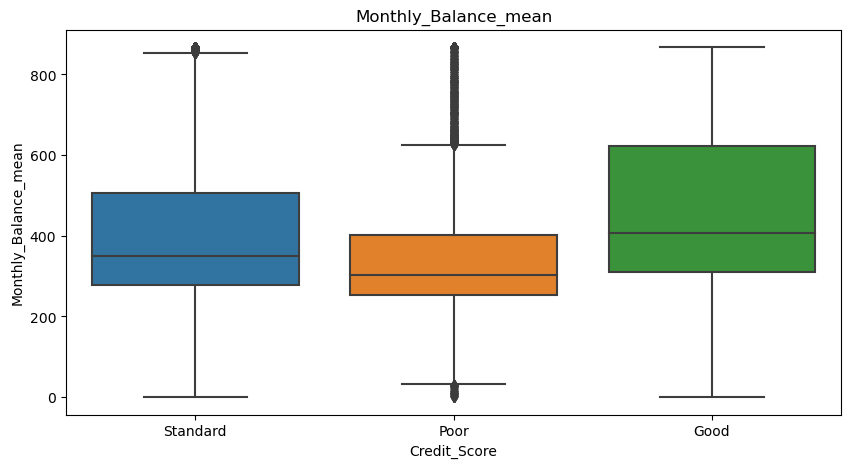

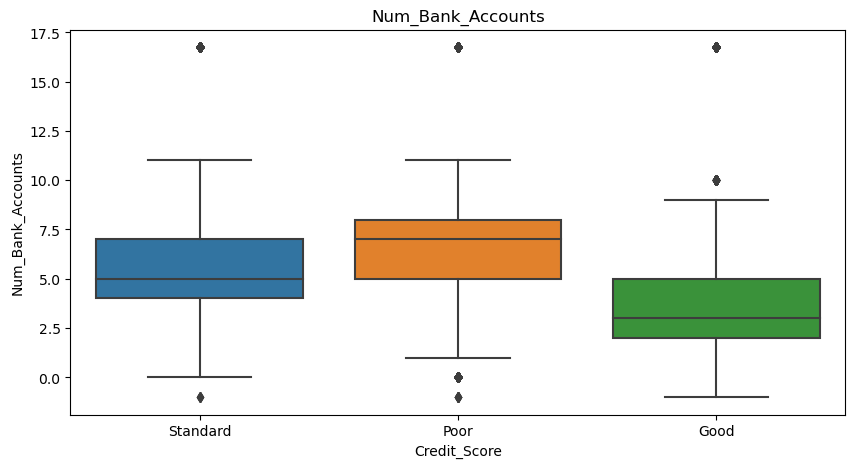

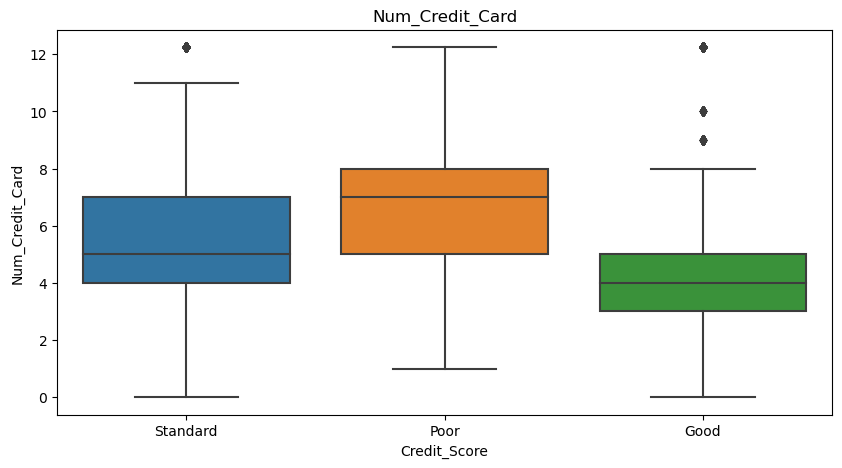

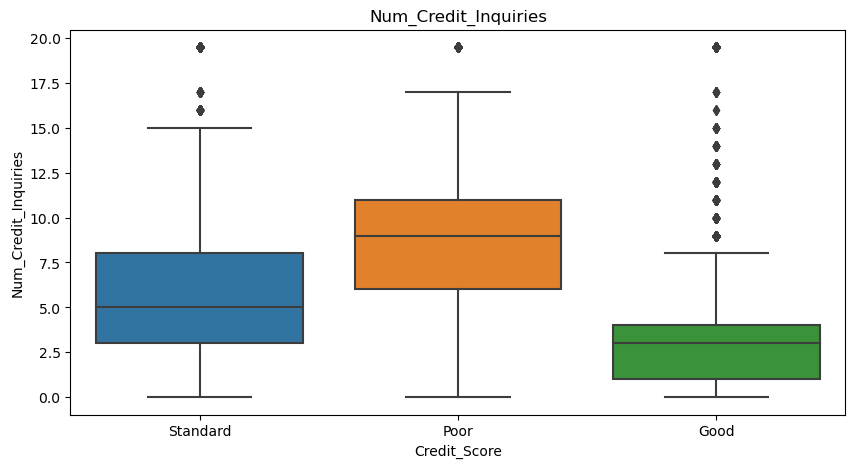

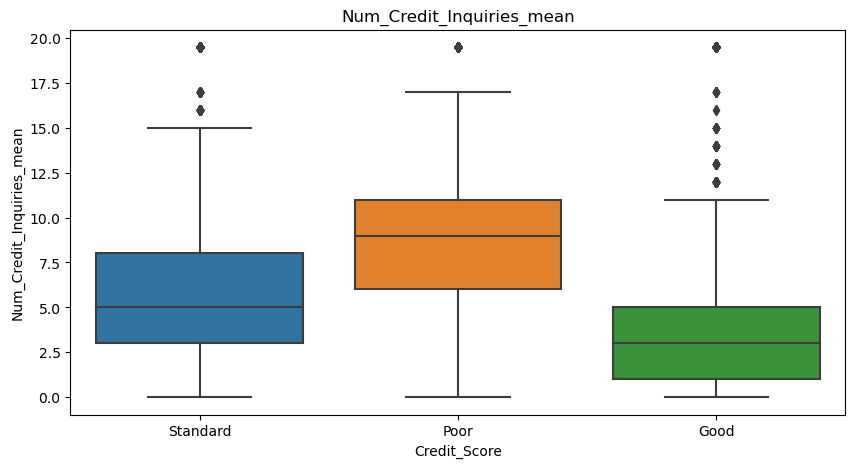

In [42]:
for colName in continuas:
       plt.figure(figsize=(10, 5))
       sns.boxplot(x=df_temp['Credit_Score'], y=df_temp[colName])
       plt.title(colName)
       plt.show()

Se concluye que las variables Changed_Credit_Limit, Credit_Utilizarion_Ratio, Total_EMI_per_month, Amount_invested_monthly deben ser quitadas del modelo pues sus variables no tienen tanto efecto sobre la variable target Credit_Score como puede observarse en el grafico de cajas

c:\Users\50259\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\50259\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\50259\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

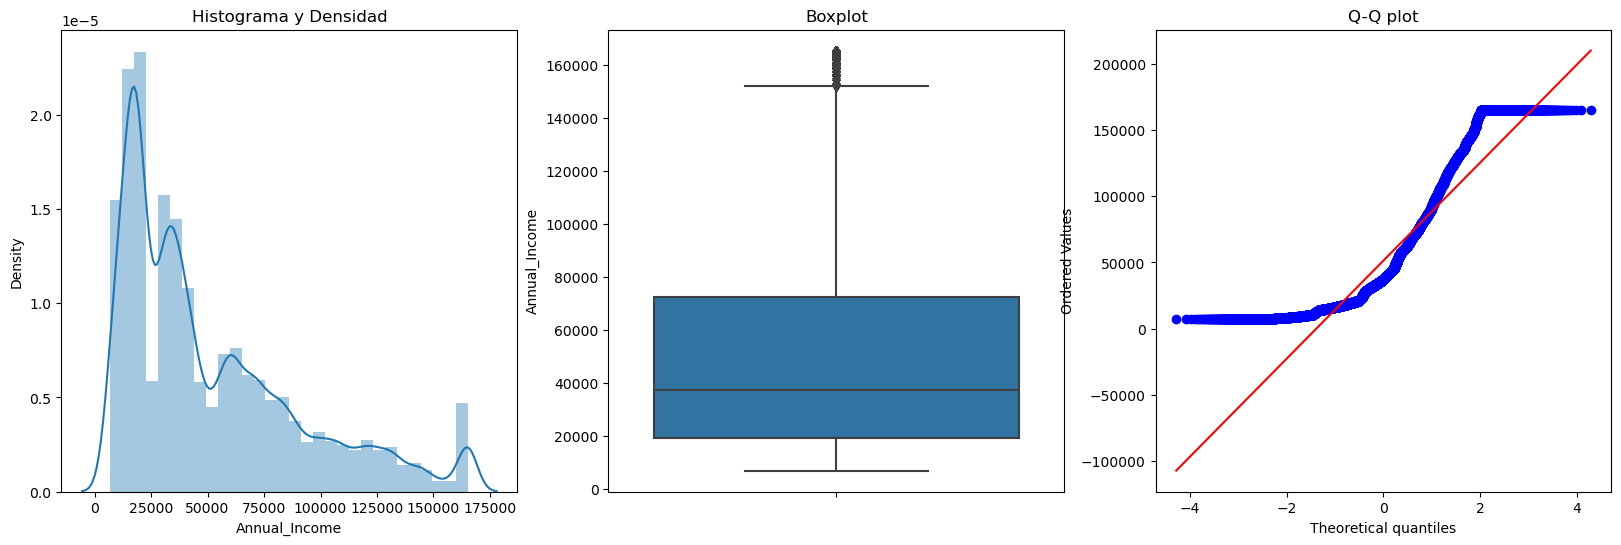

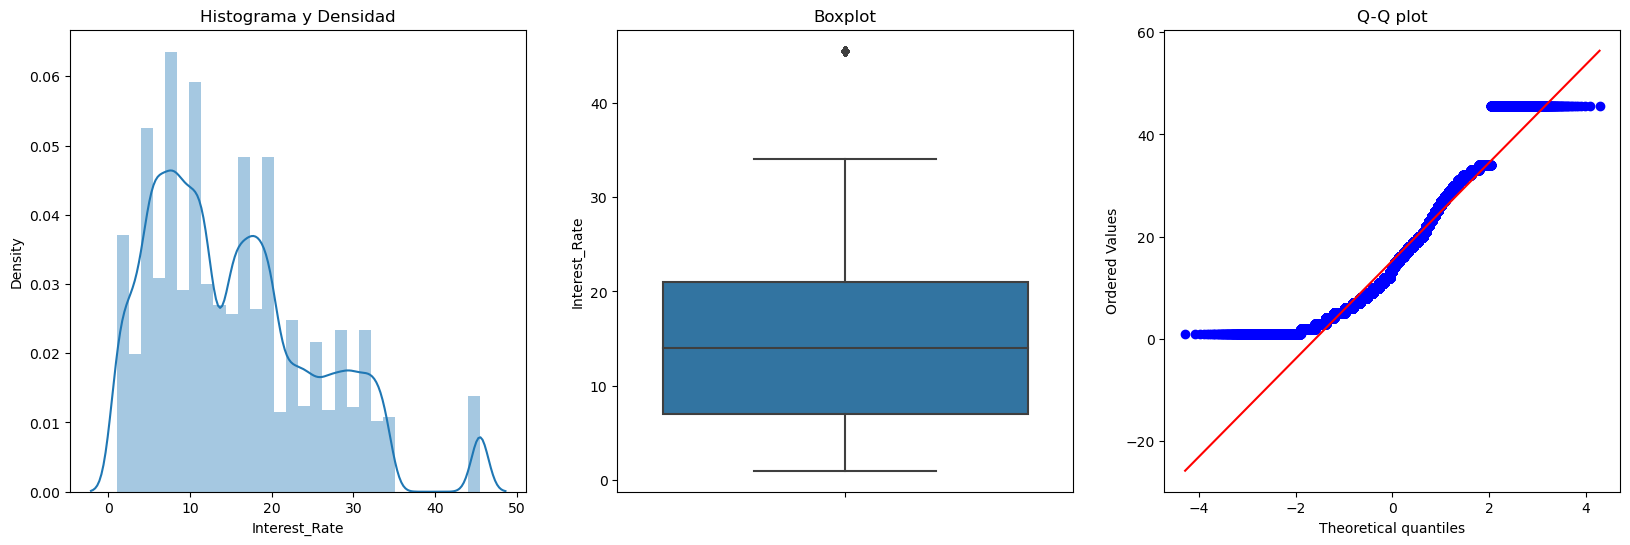

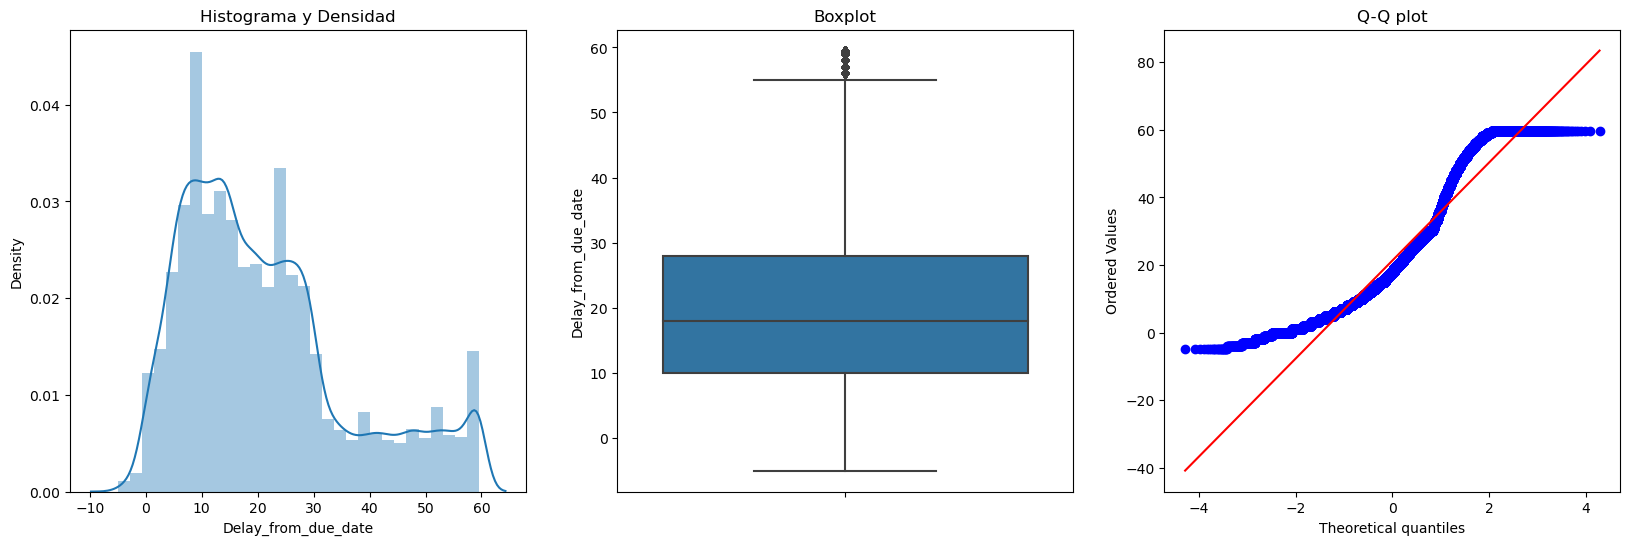

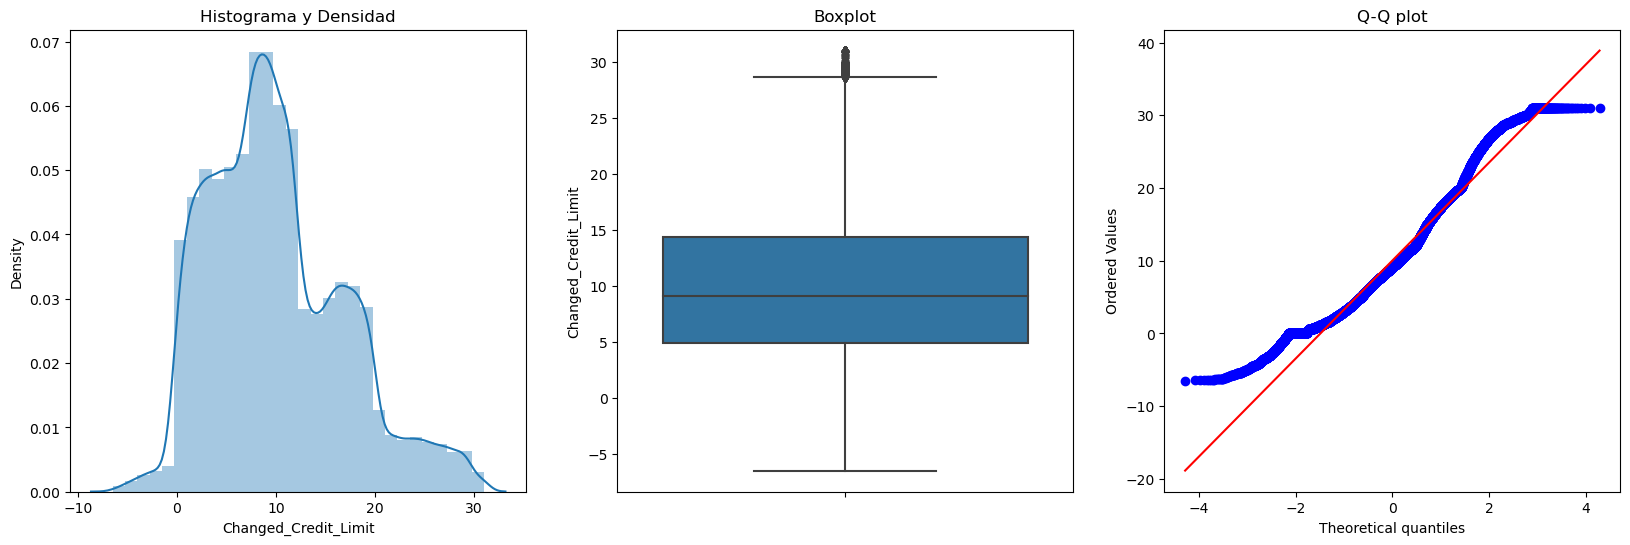

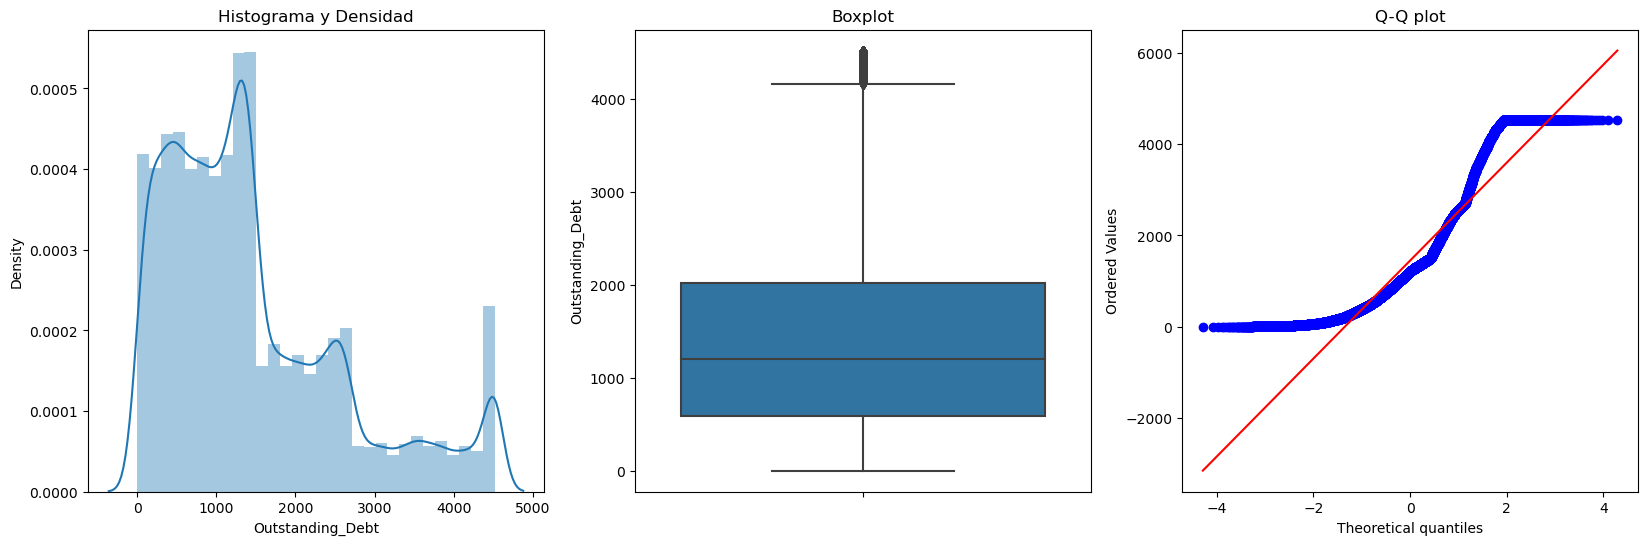

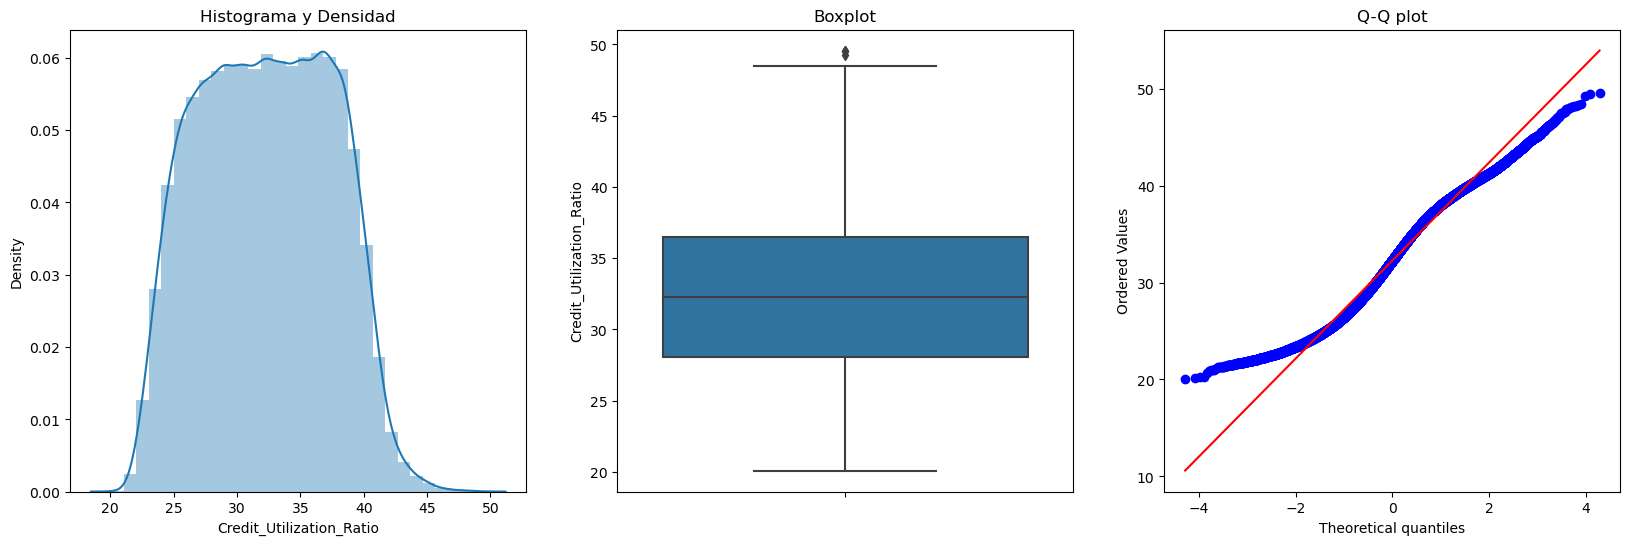

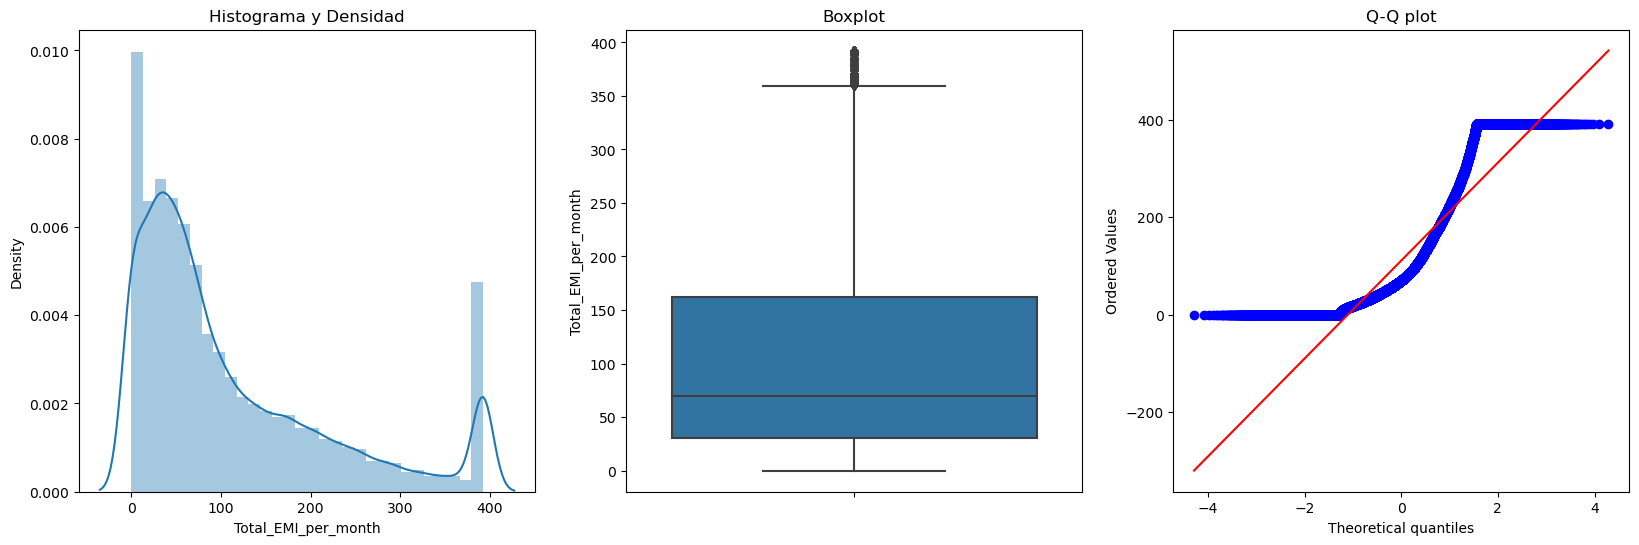

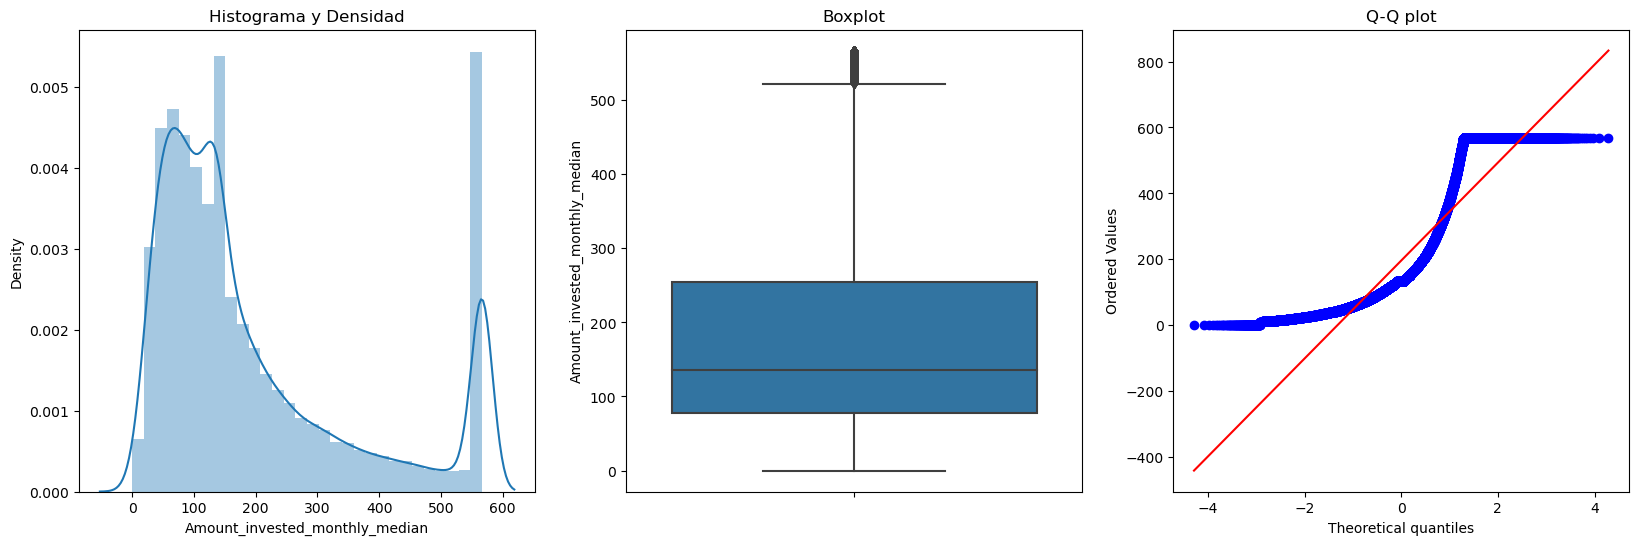

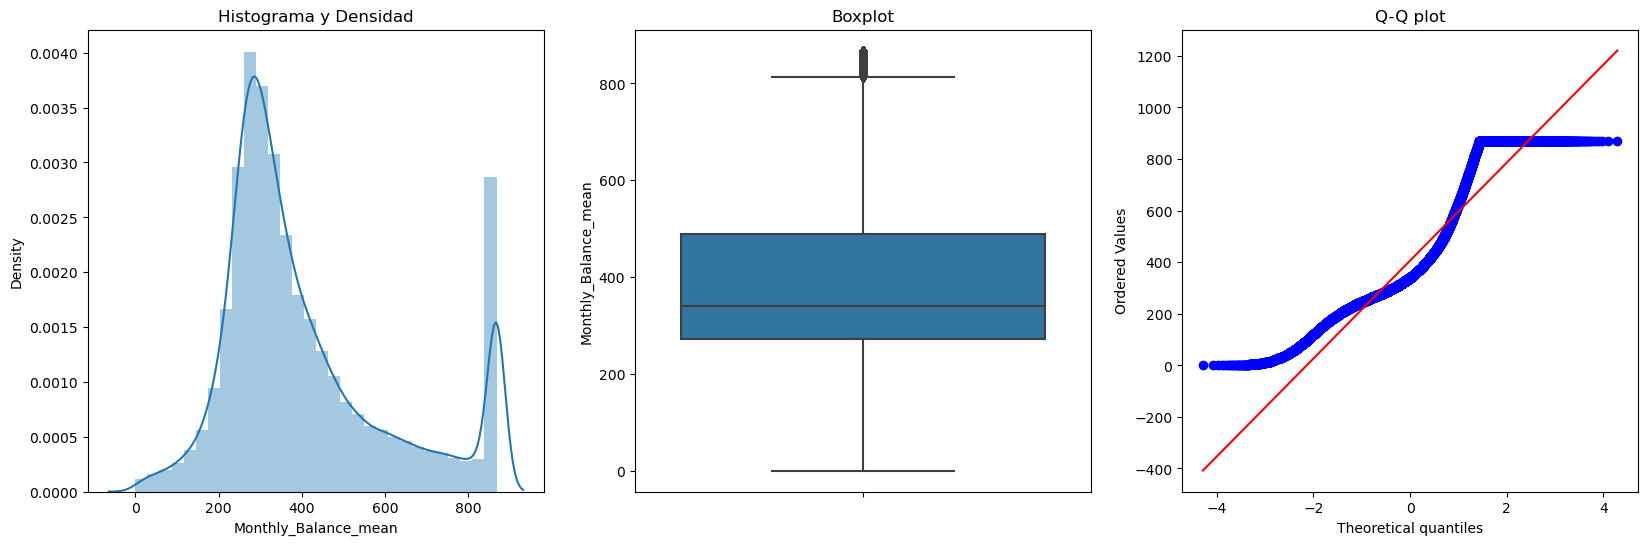

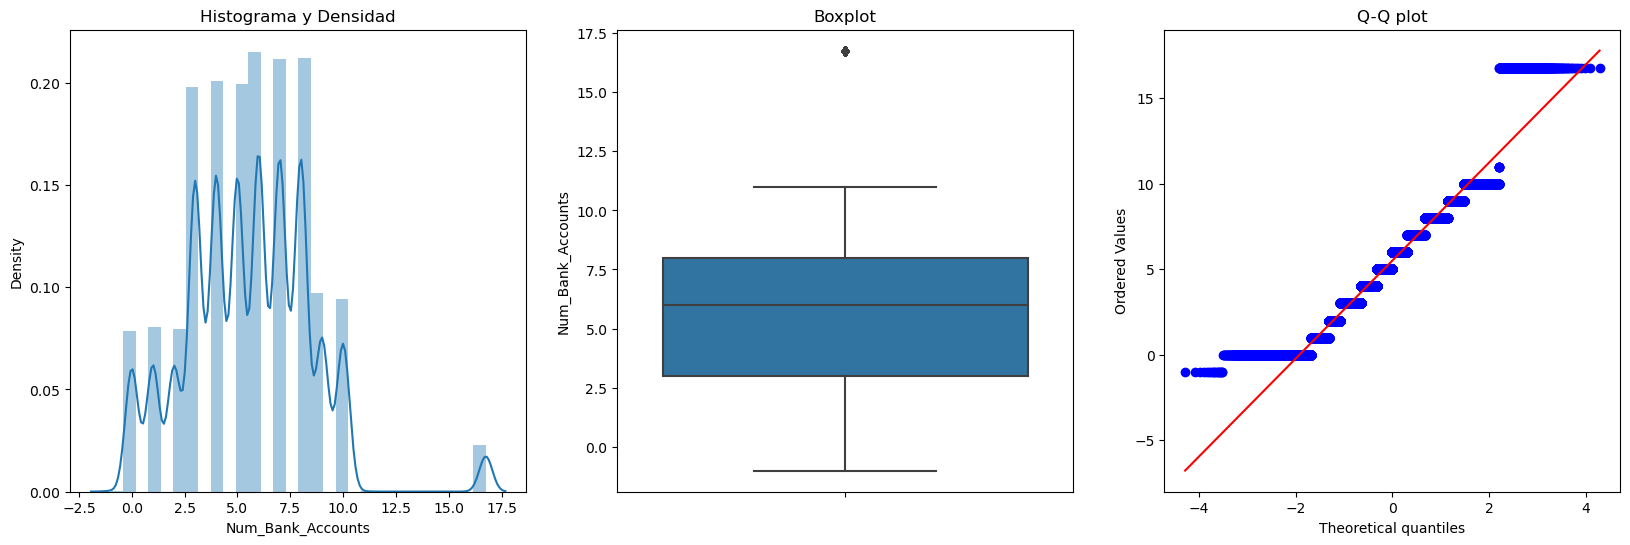

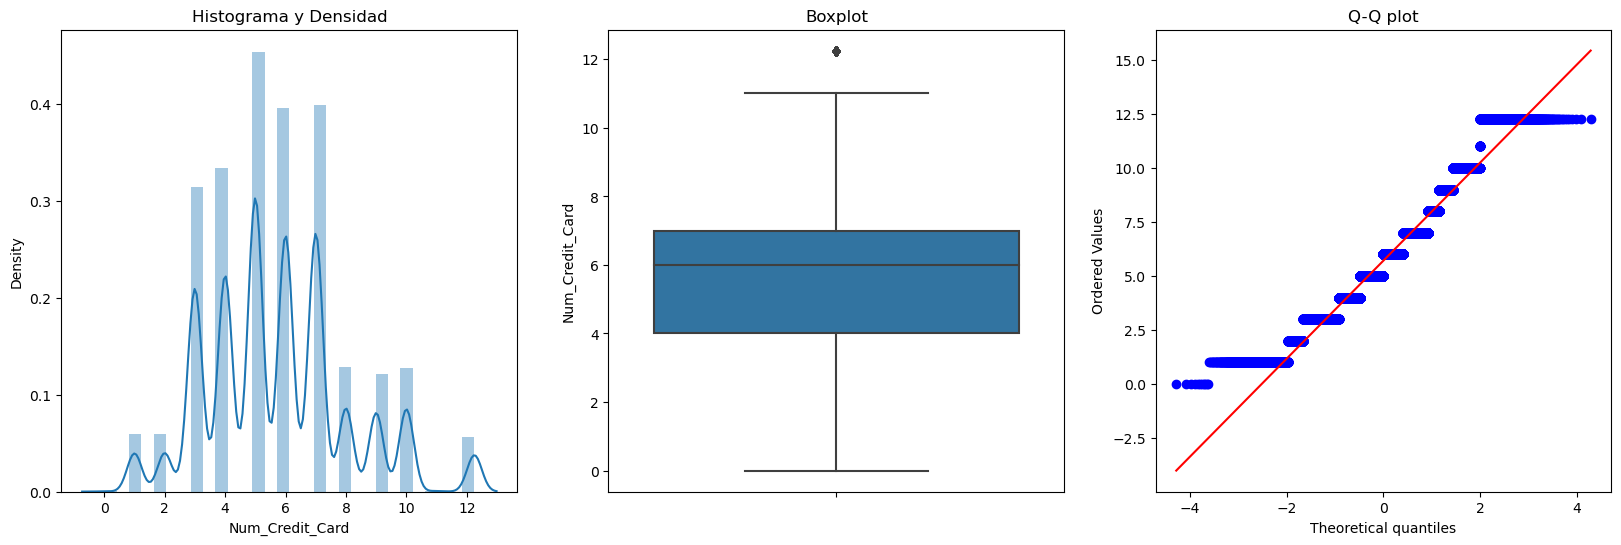

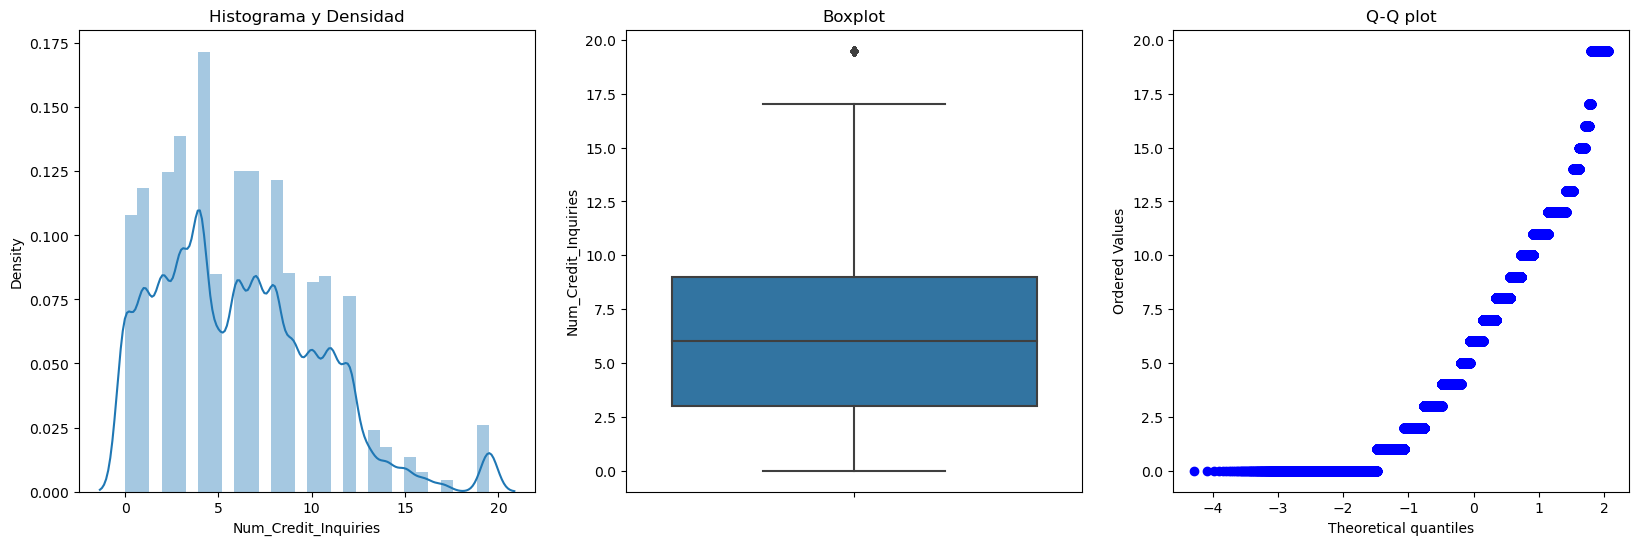

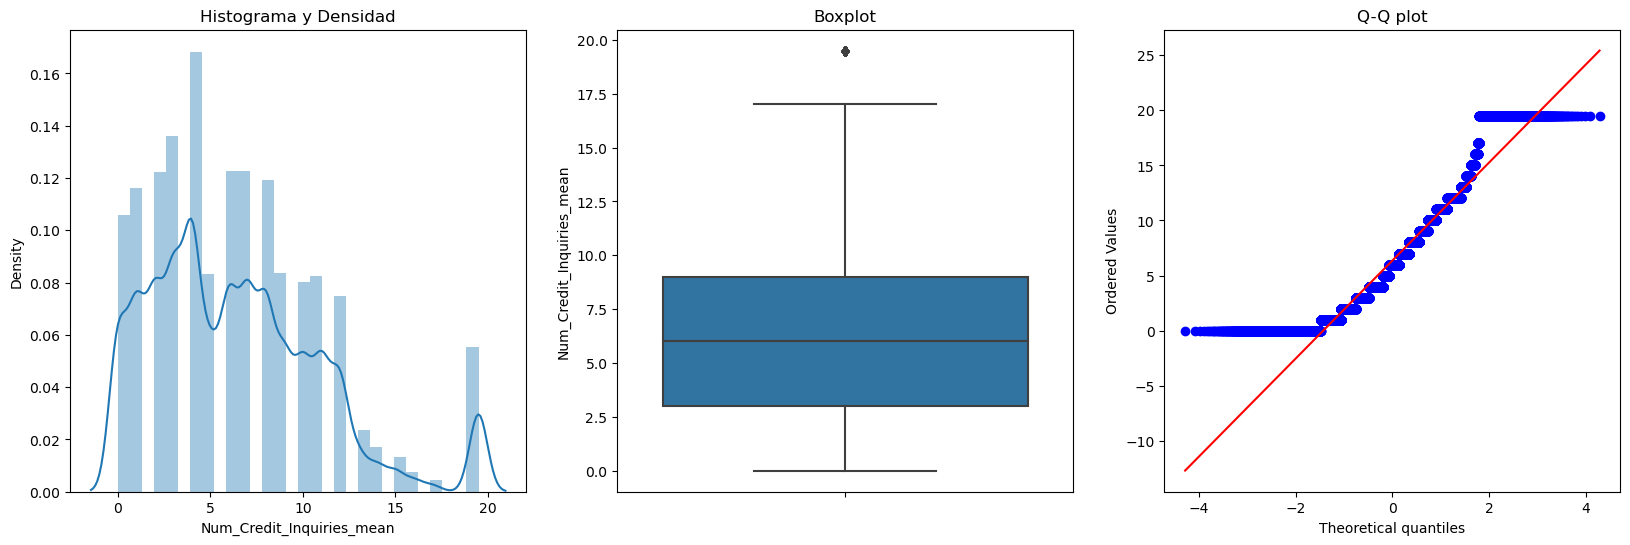

In [71]:
for c in continuas:
    plotDistBoxQQ(df_temp,c)

### Transformacion de variable numerica

In [72]:
#Valido que no existan negativos o cero
for col in continuas:
    minimo=df_temp[col].min()
    if minimo<=0:
        df_temp[col]=df_temp[col]+abs(minimo)+1
    else:
        df_temp[col]=df_temp[col]

In [73]:
for col in continuas:
    print(f"col: {col} min: {df_temp[col].min()}")

col: Annual_Income min: 7005.93
col: Interest_Rate min: 1.0
col: Delay_from_due_date min: 1.0
col: Changed_Credit_Limit min: 1.0
col: Outstanding_Debt min: 0.23
col: Credit_Utilization_Ratio min: 20.10076996070649
col: Total_EMI_per_month min: 1.0
col: Amount_invested_monthly_median min: 1.0
col: Monthly_Balance_mean min: 1.0
col: Num_Bank_Accounts min: 1.0
col: Num_Credit_Card min: 1.0
col: Num_Credit_Inquiries min: 1.0
col: Num_Credit_Inquiries_mean min: 1.0


In [74]:
for c in df_temp[continuas].columns: 
    name=c+'_log'
    df_temp[name]=np.log(df_temp[c])
    name=c+'_inv'
    df_temp[name]=(1/df_temp[c])
    name=c+'_cuad'
    df_temp[name]=(df_temp[c]**2)
    name=c+'_coxbox'
    df_temp[name],_=stats.boxcox(df_temp[c])
    name=c+'_yeo'
    df_temp[name],_=stats.yeojohnson(df_temp[c])

In [75]:
#Eleccion de transformacion
for c in df_temp.iloc[:, 30:94].columns:
    print(f'{c}\n resultado: {stats.shapiro(df_temp[c])}')
   

c:\Users\50259\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Annual_Income_log
 resultado: ShapiroResult(statistic=0.9757751226425171, pvalue=0.0)
Annual_Income_inv
 resultado: ShapiroResult(statistic=0.8413327932357788, pvalue=0.0)
Annual_Income_cuad
 resultado: ShapiroResult(statistic=0.6862865686416626, pvalue=0.0)
Annual_Income_coxbox
 resultado: ShapiroResult(statistic=0.9760403633117676, pvalue=0.0)
Annual_Income_yeo
 resultado: ShapiroResult(statistic=0.9760383367538452, pvalue=0.0)
Interest_Rate_log
 resultado: ShapiroResult(statistic=0.9370160698890686, pvalue=0.0)
Interest_Rate_inv
 resultado: ShapiroResult(statistic=0.5289916396141052, pvalue=0.0)
Interest_Rate_cuad
 resultado: ShapiroResult(statistic=0.7570151090621948, pvalue=0.0)
Interest_Rate_coxbox
 resultado: ShapiroResult(statistic=0.9869058132171631, pvalue=0.0)
Interest_Rate_yeo
 resultado: ShapiroResult(statistic=0.9860630035400391, pvalue=0.0)
Delay_from_due_date_log
 resultado: ShapiroResult(statistic=0.9835835695266724, pvalue=0.0)
Delay_from_due_date_inv
 resultado: Shap

En conclusion se tiene un mejor comportamiento de distribucion si se aplica transformacion coxbox y yeon-johson en algunos casos

### Codificacion de variable categorica

In [76]:
# para todas las columnas con valores categoricos se codifica segun frecuencia y orden alfabetico 
for c in df_temp[catGen].columns:
    Variable_freq_mapper=(df_temp[c].value_counts().sort_values(ascending=False)).to_dict()
    code=c+'_code'
    df_temp[code]=df_temp[c].map(Variable_freq_mapper)

In [83]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82482 entries, 66552 to 99983
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        82482 non-null  object 
 1   Customer_ID               82482 non-null  object 
 2   Month                     82482 non-null  object 
 3   Age                       82482 non-null  int32  
 4   SSN                       82482 non-null  object 
 5   Occupation                82482 non-null  object 
 6   Annual_Income             82482 non-null  float64
 7   Num_Bank_Accounts         82482 non-null  int64  
 8   Num_Credit_Card           82482 non-null  int64  
 9   Interest_Rate             82482 non-null  int64  
 10  Num_of_Loan               82482 non-null  int32  
 11  Delay_from_due_date       82482 non-null  int64  
 12  Changed_Credit_Limit      82482 non-null  float64
 13  Num_Credit_Inquiries      80876 non-null  float64
 14  Cr

### Aplicacion de Escala

In [77]:
df_final=df_temp.copy()[[ 
 'Num_Credit_Inquiries_mean_coxbox',
'Amount_invested_monthly_median_yeo',
 'Monthly_Balance_mean_yeo',
'Annual_Income_coxbox',
 'Interest_Rate_coxbox',
 'Delay_from_due_date_yeo',
 'Changed_Credit_Limit_yeo',
'Outstanding_Debt_coxbox',
'Credit_Utilization_Ratio_coxbox',
 'Total_EMI_per_month_yeo',
'Num_Bank_Accounts_coxbox',
'Num_Credit_Card_coxbox',
 'Month_code',
 'Occupation_code',
 'Credit_Mix_code',
 'Payment_of_Min_Amount_code',
 'Payment_Behaviour_code',
 'Credit_Score_code']
]

In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
scaler=StandardScaler()
scaler.fit(df_final)
df_final_scaled=scaler.transform(df_final)
df_final_scaled=pd.DataFrame(df_final_scaled,columns=df_final.columns)

In [80]:
df['Credit_Mix'].value_counts()

Standard    36479
Good        24337
_           20195
Bad         18989
Name: Credit_Mix, dtype: int64